In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

# DEFINE PATHS:

# for the corpus:
path_to_corpus = './corpus_newspaper_novels/'

# for spreadsheets:
path_to_meta_data = './spreadsheets/metadata_corpus.csv'
meta_data = 'metadata_corpus.csv'

# for assets:
path_to_assets = './assets/'
exclude = 'all_characters_and_numbers_to_exclude.txt'
# Stopwords are from: https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7
stop_words = 'stopwords.txt'

# for all output files:
path_output = './spreadsheets/'




In [2]:
# UTILITY CODE:

# This section is important to be able to open large dataframes, redefining the memory limit.
# Be careful not to mess with this as this can drastically affect memory:

# Data matrix and data frame are huge files, these lines are required to open them:
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs
    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)
        
# https://stackoverflow.com/questions/15063936/csv-error-field-larger-than-field-limit-131072

In [3]:
# Functions
# for metadata output:
def output_metadata(df, spreadsheet_name = 'BLA', path_output = './spreadsheets/'):
    list_of_columns_not_to_include = ['words_standardized_stopped', 'sentences_standardized_stopless','words_as_string_for_vectorizor', 'dirty_text']
    columns_to_include = [column_name for column_name in df.columns.values.tolist() if column_name.lower() not in list_of_columns_not_to_include]
    df_meta = df[columns_to_include]
    df_meta.to_csv(path_output + spreadsheet_name + '.csv')
    print(spreadsheet_name + ' was saved in '+str(path_output))
    
# for full output:
def output_full(df, spreadsheet_name = 'BLA', path_output = './spreadsheets/'):
    df.to_csv(path_output + spreadsheet_name + '.csv')
    print(spreadsheet_name + ' was saved in '+str(path_output))
    
def open_df_and_print(file_name = 'df_nnovels_full.csv', path_output = './spreadsheets/', drop_first_column=False):
    df = pd.read_csv(path_output + file_name, engine='python')
    if drop_first_column == True:
        df.drop(df.columns[0], axis=1, inplace=True)
    return df
    

In [4]:
# FUNCTIONS 4:
# Visualize statistics over time using matplot:

# needs some work to make multiple columns visualizable:
def visualize_numerical_columns__over_time(dfs, list_of_columns_to_visualize, date_column='book_year', graph_y_label='What are we counting?', title='SOMETHING over Time'):
    import matplotlib.pyplot as plt
    import random
    from matplotlib.lines import Line2D
    index = 0
    years_list = []
    counts_list = []
    labels_list = []
    colors_list = []
    elements_to_analyze = ["mean", "min", "max"]
    print_info = []
    which_df = 0
    for df in dfs:
        for column_name in list_of_columns_to_visualize:
            grouped_by_year = pd.to_numeric(df[column_name]).groupby(df[date_column])
            grouped_by_year = grouped_by_year.mean().reset_index()
            years = np.array(grouped_by_year[date_column].tolist())
            count_to_visualize = np.array(grouped_by_year[column_name].tolist())
            years_list.append(years)
            counts_list.append(count_to_visualize)
            labels_list.append("DF_"+ str(which_df) +"_"+ column_name)
            # getting random colors:
            r = random.random()
            b = random.random()
            g = random.random()
            color = (r, g, b)
            colors_list.append(color)
            print_info.append(["The AVG of " + column_name + " of DF_" + str(which_df) +" is "+ str(df[column_name].mean())])
            print_info.append(["The MIN of " + column_name + " of DF_" + str(which_df) +" is "+ str(df[column_name].min())])
            print_info.append(["The MAX of " + column_name + " of DF_" + str(which_df) +" is "+ str(df[column_name].max())])
        which_df += 1
        
    # Plotting Word count per year per year:
    plt.figure(figsize=(20,10))
    for index in range(len(labels_list)):
        plt.plot(years_list[index], counts_list[index], label=labels_list[index], c=colors_list[index])
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()
    for info in print_info:
        print(info)


In [89]:
def visualize_scatter_x_y(dfs, column_x, column_y, title='SOMETHING SCATTERED', place_label_above_by_how_much=1, percentile=2):
    import matplotlib.pyplot as plt
    import random
    x_list = []
    y_list = []
    labels_list = []
    colors_list = []
    print_info = []
    plt.figure(figsize=(20,15))
    which_df = 0
    for df in dfs:
        x = np.array(df[column_x].to_numpy())
        x_list.append(x)
        y = np.array(df[column_y].to_numpy())
        y_list.append(y)
        labels_list.append("DF_"+ str(which_df))
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        colors_list.append(color)
        plt.scatter(x, y, color = color, label=labels_list[which_df])
       
        for i in range(len(x)):
            if x[i] > np.percentile(x, 100-percentile):
                plt.annotate(df['book_title'][i], (x[i], y[i] + place_label_above_by_how_much), color = color)
            if x[i] < np.percentile(x, percentile):
                plt.annotate(df['book_title'][i], (x[i], y[i] + place_label_above_by_how_much), color = color)
            if y[i] > np.percentile(y, 100-percentile):
                plt.annotate(df['book_title'][i], (x[i], y[i] + place_label_above_by_how_much), color = color)
            if y[i] < np.percentile(y, percentile):
                plt.annotate(df['book_title'][i], (x[i], y[i] + place_label_above_by_how_much), color = color)
        print_info.append(["The AVG of " + column_y + " of DF_" + str(which_df) +" is "+ str(df[column_y].mean())])
        print_info.append(["The MIN of " + column_y + " of DF_" + str(which_df) +" is "+ str(df[column_y].min())])
        print_info.append(["The MAX of " + column_y + " of DF_" + str(which_df) +" is "+ str(df[column_y].max())])
        which_df += 1
    plt.legend(loc='upper left')
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.title(title)
    plt.show()
    for info in print_info:
        print(info)

In [ ]:
## Run functions up to here

In [6]:
## OUTPUT STARTS HERE:


In [7]:
# importing NNOVELS:
df_nnovels_meta = open_df_and_print(file_name = 'df_nnovels_meta.csv', path_output = './spreadsheets/', drop_first_column=True)

df_nnovels_meta.head()

,book_title,book_year,author_name,words_count_stopless,words_count_stopped,percentage_stopped_of_stoppless,sentences_count,average_words_per_sentence,full_text_ttr,mattr_500,mattr_2000,all_pos_counts,50_most_common_nouns,50_most_common_verbs,POS_PUNCT,POS_NOUN,POS_DET,POS_ADJ,POS_VERB,POS_SCONJ,POS_ADP,POS_AUX,POS_PART,POS_CCONJ,POS_ADV,POS_PROPN,POS_PRON,POS_NUM,POS_INTJ,POS_X,noun_percentage,verb_and_aux_percentage,POS_SYM,parts_of_speech_total_count,%POS_PUNCT,%POS_NOUN,%POS_DET,%POS_ADJ,%POS_VERB,%POS_SCONJ,%POS_ADP,%POS_AUX,%POS_PART,%POS_CCONJ,%POS_ADV,%POS_PROPN,%POS_PRON,%POS_NUM,%POS_INTJ,%POS_X,%POS_SYM
0,Agnes_Grey,1847,Anne_Bronte,67718.0,24161.0,35.678845,3201.0,21.175258,0.108841,0.519898,0.368708,"[['PUNCT', 4930], ['NOUN', 10116], ['DET', 825...","[('time', 142), ('mother', 124), ('day', 65), ...","[('would', 379), ('could', 260), ('said', 186)...",4930.0,10116.0,8255.0,4864.0,10808.0,2000.0,6730.0,3776.0,2632.0,3931.0,5084.0,2033.0,8228.0,357.0,277.0,37.0,13.660,14.594,0.0,74058.0,6.657,13.660,11.147,6.568,14.594,2.701,9.087,5.099,3.554,5.308,6.865,2.745,11.110,0.482,0.374,0.050,0.000
1,Armadale,1864,Wilkie_Collins,295546.0,111234.0,37.636781,19298.0,15.344647,0.045656,0.497521,0.341371,"[['ADP', 36354], ['PUNCT', 20620], ['DET', 436...","[('time', 864), ('midwinter', 786), ('man', 70...","[('said', 1136), ('will', 694), ('would', 578)...",20620.0,52174.0,43605.0,18284.0,44704.0,6609.0,36354.0,16230.0,9975.0,9477.0,17419.0,12346.0,32389.0,1712.0,541.0,25.0,16.180,13.863,0.0,322464.0,6.395,16.180,13.522,5.670,13.863,2.050,11.274,5.033,3.093,2.939,5.402,3.829,10.044,0.531,0.168,0.008,0.000
2,Aurora_Floyd,1863,Mary_Elizabeth_Braddon,183016.0,74878.0,40.913363,9425.0,19.422599,0.075907,0.529468,0.381519,"[['PROPN', 9662], ['ADV', 10206], ['DET', 2736...","[('man', 506), ('face', 245), ('time', 233), (...","[('said', 562), ('would', 553), ('could', 449)...",10576.0,33566.0,27368.0,13795.0,25284.0,5435.0,20867.0,9771.0,4237.0,7753.0,10206.0,9662.0,15633.0,1101.0,394.0,56.0,17.151,12.919,2.0,195706.0,5.404,17.151,13.984,7.049,12.919,2.777,10.662,4.993,2.165,3.962,5.215,4.937,7.988,0.563,0.201,0.029,0.001
3,Belinda:A_Novel,1883,Rhoda_Broughton,147937.0,57386.0,38.790837,10248.0,14.100898,0.092824,0.534271,0.384540,"[['PROPN', 5341], ['ADP', 14886], ['DET', 1801...","[('eyes', 227), ('voice', 212), ('one', 175), ...","[('says', 577), ('will', 562), ('would', 431),...",11552.0,23275.0,18018.0,10336.0,20488.0,4025.0,14886.0,9313.0,4134.0,4949.0,10799.0,5341.0,15702.0,908.0,444.0,125.0,15.085,13.278,0.0,154295.0,7.487,15.085,11.678,6.699,13.278,2.609,9.648,6.036,2.679,3.207,6.999,3.462,10.177,0.588,0.288,0.081,0.000
4,Birds_of_Prey,1867,Mary_Elizabeth_Braddon,161547.0,64208.0,39.745709,8357.0,19.335168,0.083881,0.526442,0.376160,"[['PROPN', 8773], ['DET', 23096], ['ADP', 1857...","[('man', 426), ('time', 269), ('life', 233), (...","[('would', 490), ('said', 422), ('could', 327)...",9019.0,29719.0,23096.0,12741.0,21333.0,4212.0,18573.0,9380.0,4281.0,6808.0,8960.0,8773.0,13952.0,1085.0,427.0,46.0,17.238,12.374,0.0,172405.0,5.231,17.238,13.396,7.390,12.374,2.443,10.773,5.441,2.483,3.949,5.197,5.089,8.093,0.629,0.248,0.027,0.000


In [8]:
# importing TXTLAB:
df_txtlab_meta = open_df_and_print(file_name = 'df_txtlab_meta.csv', path_output = './spreadsheets/', drop_first_column=True)

df_txtlab_meta.head()

,filename,id,language,book_year,author_name,book_title,gender,person,length,sentences_count,average_words_per_sentence,words_count_stopless,words_count_stopped,percentage_stopped_of_stoppless,full_text_ttr,mattr_500,mattr_2000,all_pos_counts,50_most_common_nouns,50_most_common_verbs,POS_SPACE,POS_NOUN,POS_PART,POS_PRON,POS_AUX,POS_VERB,POS_DET,POS_ADP,POS_CCONJ,POS_NUM,POS_ADJ,POS_ADV,POS_PROPN,POS_PUNCT,POS_SCONJ,POS_INTJ,noun_percentage,verb_and_aux_percentage,POS_X,POS_SYM,parts_of_speech_total_count,%POS_SPACE,%POS_NOUN,%POS_PART,%POS_PRON,%POS_AUX,%POS_VERB,%POS_DET,%POS_ADP,%POS_CCONJ,%POS_NUM,%POS_ADJ,%POS_ADV,%POS_PROPN,%POS_PUNCT,%POS_SCONJ,%POS_INTJ,%POS_X,%POS_SYM
0,"EN_1771_Mackenzie,Henry_TheManofFeeling_Novel.txt",151,English,1771,"Mackenzie,Henry",TheManofFeeling,male,first,36458,1706,21.409730,36466.0,13450.0,36.883672,0.140174,0.513110,0.368638,"[['SPACE', 1], ['NOUN', 7100], ['PART', 1078],...","[('man', 107), ('harley', 98), ('time', 69), (...","[('said', 177), ('had', 116), ('have', 55), ('...",1.0,7100.0,1078.0,5826.0,2552.0,4924.0,3798.0,4600.0,1246.0,172.0,2113.0,1643.0,702.0,2389.0,924.0,43.0,18.153,12.590,0.0,0.0,39111.0,0.003,18.153,2.756,14.896,6.525,12.590,9.711,11.761,3.186,0.440,5.403,4.201,1.795,6.108,2.363,0.110,0.000,0.0
1,"EN_1771_Smollett,Tobias_TheExpedictionofHenryC...",152,English,1771,"Smollett,Tobias",TheExpedictionofHenryClinker,male,first,148261,4046,36.803757,148342.0,58767.0,39.615888,0.096339,0.548865,0.406835,"[['DET', 16161], ['NOUN', 31025], ['ADP', 1942...","[('time', 214), ('man', 170), ('uncle', 169), ...","[('have', 327), ('had', 302), ('said', 275), (...",0.0,31025.0,3685.0,19040.0,9556.0,18494.0,16161.0,19426.0,6687.0,1066.0,10369.0,6469.0,3773.0,7237.0,4076.0,168.0,19.726,11.759,48.0,0.0,157280.0,0.000,19.726,2.343,12.106,6.076,11.759,10.275,12.351,4.252,0.678,6.593,4.113,2.399,4.601,2.592,0.107,0.031,0.0
2,"EN_1778_Burney,Fanny_Evelina_Novel.txt",153,English,1778,"Burney,Fanny",Evelina,female,first,154168,8796,17.597090,154207.0,56522.0,36.653330,0.056366,0.506874,0.340754,"[['PROPN', 7566], ['CCONJ', 5728], ['DET', 114...","[('sir', 346), ('time', 311), ('duval', 282), ...","[('said', 759), ('cried', 479), ('have', 377),...",0.0,22810.0,5443.0,27275.0,11664.0,23175.0,11423.0,14697.0,5728.0,528.0,9046.0,10810.0,7566.0,9711.0,5345.0,585.0,13.752,13.972,65.0,0.0,165871.0,0.000,13.752,3.281,16.444,7.032,13.972,6.887,8.861,3.453,0.318,5.454,6.517,4.561,5.855,3.222,0.353,0.039,0.0
3,"EN_1782_Burney,Fanny_Cecilia_Novel.txt",154,English,1782,"Burney,Fanny",Cecilia,female,third,328981,14427,22.851667,329111.0,121105.0,36.797615,0.036603,0.513481,0.352431,"[['NOUN', 52635], ['CCONJ', 14114], ['ADP', 34...","[('cecilia', 1303), ('delvile', 609), ('time',...","[('said', 1209), ('cried', 1096), ('had', 715)...",0.0,52635.0,11420.0,54048.0,23171.0,49289.0,25047.0,34713.0,14114.0,1089.0,20812.0,22976.0,10188.0,18834.0,10114.0,1110.0,15.056,14.099,24.0,0.0,349584.0,0.000,15.056,3.267,15.461,6.628,14.099,7.165,9.930,4.037,0.312,5.953,6.572,2.914,5.388,2.893,0.318,0.007,0.0
4,"EN_1786_Beckford,William_Vathek_Novel.txt",155,English,1786,"Beckford,William",Vathek,male,third,36077,1651,21.854028,36077.0,15159.0,42.018461,0.160555,0.561703,0.416900,"[['PROPN', 514], ['PUNCT', 1929], ['DET', 4290...","[('caliph', 145), ('p.', 134), ('carathis', 74...","[('said', 72), ('had', 43), ('let', 40), ('beg...",0.0,7855.0,897.0,4358.0,1807.0,5052.0,4290.0,4899.0,1411.0,212.0,2415.0,1613.0,514.0,1929.0,757.0,45.0,20.638,13.274,6.0,0.0,38060.0,0.000,20.638,2.357,11.450,4.748,13.274,11.272,12.872,3.707,0.557,6.345,4.238,1.350,5.068,1.989,0.118,0.016,0.0


In [9]:
# getting both DFs as list for analysis
dfs = [df_nnovels_meta, df_txtlab_meta]

In [10]:
## First OVER TIME ANALYSIS:
## 1) BASIC STATS

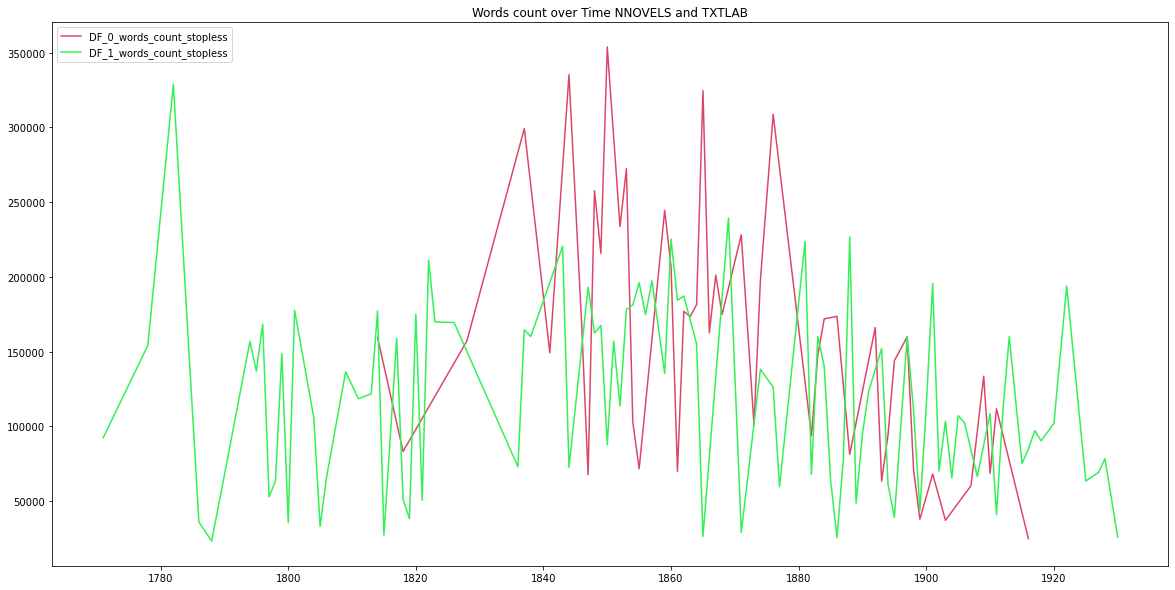

['The AVG of words_count_stopless of DF_0 is 163686.7']
['The MIN of words_count_stopless of DF_0 is 24909.0']
['The MAX of words_count_stopless of DF_0 is 354478.0']
['The AVG of words_count_stopless of DF_1 is 123274.19333333333']
['The MIN of words_count_stopless of DF_1 is 23275.0']
['The MAX of words_count_stopless of DF_1 is 356432.0']


In [12]:
## AVG words (not stopped):
visualize_numerical_columns__over_time(dfs, ['words_count_stopless'], date_column='book_year', graph_y_label='Word Count', title='Words count over Time NNOVELS and TXTLAB')
## NOTES:
## NNOVEL corpus is much higher during the popular period of ACs 1840s-1880s

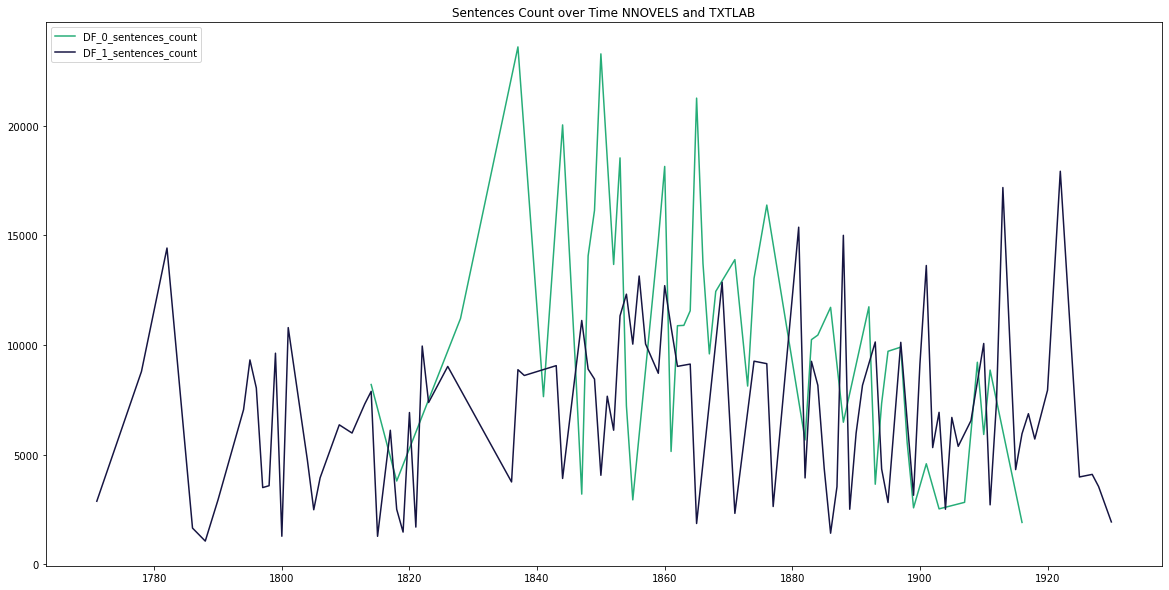

['The AVG of sentences_count of DF_0 is 10631.971428571429']
['The MIN of sentences_count of DF_0 is 1909.0']
['The MAX of sentences_count of DF_0 is 24438.0']
['The AVG of sentences_count of DF_1 is 7264.133333333333']
['The MIN of sentences_count of DF_1 is 1058']
['The MAX of sentences_count of DF_1 is 26855']


In [18]:
## AVG words per sentence:
visualize_numerical_columns__over_time(dfs, ['sentences_count'], date_column='book_year', graph_y_label='Sentences count', title='Sentences Count over Time NNOVELS and TXTLAB')
## NOTES:
## NNOVEL corpus is much higher during the popular period of ACs 1840s-1880s

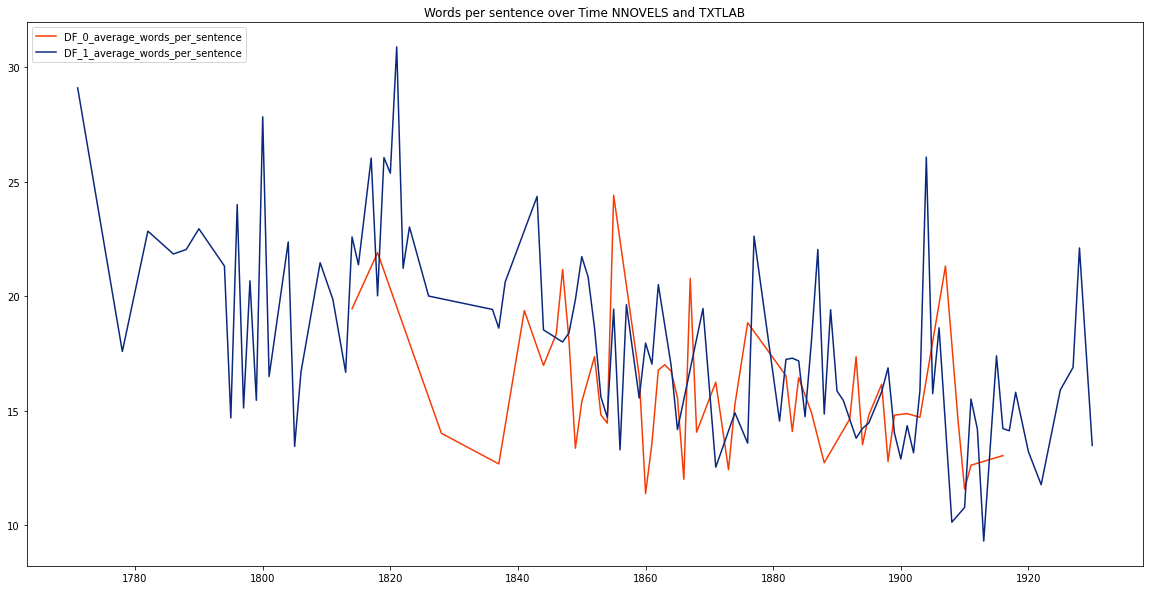

['The AVG of average_words_per_sentence of DF_0 is 15.844283556728685']
['The MIN of average_words_per_sentence of DF_0 is 11.19336544911275']
['The MAX of average_words_per_sentence of DF_0 is 24.41286589516678']
['The AVG of average_words_per_sentence of DF_1 is 17.87748068561478']
['The MIN of average_words_per_sentence of DF_1 is 9.317274684354452']
['The MAX of average_words_per_sentence of DF_1 is 42.52860858257477']


In [19]:
## AVG words per sentence:
visualize_numerical_columns__over_time(dfs, ['average_words_per_sentence'], date_column='book_year', graph_y_label='Average words per sentence', title='Words per sentence over Time NNOVELS and TXTLAB')
## NOTES: 
## Although word and sentences countis higher in 1840s-1880s in NNOVEL corpus, there are less words per sentence. 
## This could indicate similarities with newspapers, using shorter sentences

In [45]:
## Getting TXTLAB corpus only from 1814
df_txtlab_meta_1814 = df_txtlab_meta.copy()
df_txtlab_meta_1814 = df_txtlab_meta_1814.loc[df_txtlab_meta_1814["book_year"] >=1814].reset_index()
df_txtlab_meta_1814 = df_txtlab_meta_1814.loc[df_txtlab_meta_1814["book_year"] <=1916].reset_index()
df_txtlab_meta_1814.head()

,level_0,index,filename,id,language,book_year,author_name,book_title,gender,person,length,sentences_count,average_words_per_sentence,words_count_stopless,words_count_stopped,percentage_stopped_of_stoppless,full_text_ttr,mattr_500,mattr_2000,all_pos_counts,50_most_common_nouns,50_most_common_verbs,POS_SPACE,POS_NOUN,POS_PART,POS_PRON,POS_AUX,POS_VERB,POS_DET,POS_ADP,POS_CCONJ,POS_NUM,POS_ADJ,POS_ADV,POS_PROPN,POS_PUNCT,POS_SCONJ,POS_INTJ,noun_percentage,verb_and_aux_percentage,POS_X,POS_SYM,parts_of_speech_total_count,%POS_SPACE,%POS_NOUN,%POS_PART,%POS_PRON,%POS_AUX,%POS_VERB,%POS_DET,%POS_ADP,%POS_CCONJ,%POS_NUM,%POS_ADJ,%POS_ADV,%POS_PROPN,%POS_PUNCT,%POS_SCONJ,%POS_INTJ,%POS_X,%POS_SYM
0,0,26,"EN_1814_Austen,Jane_MansfieldPark_Novel.txt",177,English,1814,"Austen,Jane",MansfieldPark,female,third,159529,8202,19.454401,159532.0,53608.0,33.603290,0.052330,0.497505,0.334816,"[['PROPN', 5955], ['NOUN', 24812], ['PRON', 23...","[('fanny', 488), ('time', 311), ('edmund', 201...","[('have', 428), ('had', 412), ('said', 406), (...",0.0,24812.0,5578.0,23862.0,14764.0,20485.0,12716.0,17967.0,7387.0,822.0,10864.0,11074.0,5955.0,9839.0,4376.0,333.0,14.523,11.990,17.0,0.0,170851.0,0.0,14.523,3.265,13.967,8.641,11.990,7.443,10.516,4.324,0.481,6.359,6.482,3.485,5.759,2.561,0.195,0.010,0.000
1,1,27,"EN_1814_Scott,Walter_Waverley_Novel.txt",178,English,1814,"Scott,Walter",Waverley,male,first,194960,7577,25.745018,195013.0,81843.0,41.967971,0.083697,0.554816,0.414461,"[['PROPN', 6829], ['CCONJ', 8528], ['NOUN', 41...","[('time', 285), ('baron', 251), ('man', 236), ...","[('said', 529), ('had', 338), ('made', 212), (...",0.0,41578.0,4484.0,21765.0,11231.0,24460.0,21622.0,25095.0,8528.0,939.0,14838.0,8897.0,6829.0,9330.0,5179.0,295.0,20.260,11.919,150.0,0.0,205220.0,0.0,20.260,2.185,10.606,5.473,11.919,10.536,12.228,4.156,0.458,7.230,4.335,3.328,4.546,2.524,0.144,0.073,0.000
2,2,28,"EN_1815_Peacock,ThomasLove_HeadlongHall_Novel.txt",179,English,1815,"Peacock,ThomasLove",HeadlongHall,male,third,27259,1276,21.380878,27262.0,11841.0,43.434084,0.199318,0.532334,0.403822,"[['PROPN', 1452], ['ADP', 3635], ['NOUN', 5881...","[('squire', 95), ('man', 64), ('skull', 41), (...","[('said', 163), ('have', 43), ('had', 24), ('i...",0.0,5881.0,529.0,2581.0,1413.0,3078.0,3333.0,3635.0,1104.0,213.0,2279.0,1253.0,1452.0,1613.0,549.0,39.0,20.311,10.630,2.0,1.0,28955.0,0.0,20.311,1.827,8.914,4.880,10.630,11.511,12.554,3.813,0.736,7.871,4.327,5.015,5.571,1.896,0.135,0.007,0.003
3,3,29,"EN_1817_Scott,Walter_RobRoy_Novel.txt",180,English,1817,"Scott,Walter",RobRoy,male,first,158858,6114,26.040563,158864.0,64903.0,40.854442,0.094679,0.549442,0.407102,"[['PROPN', 5491], ['NOUN', 32523], ['ADP', 192...","[('man', 308), ('time', 237), ('father', 200),...","[('said', 625), ('had', 288), ('see', 198), ('...",0.0,32523.0,3976.0,22161.0,9340.0,21419.0,15522.0,19221.0,7303.0,756.0,11129.0,7322.0,5491.0,8327.0,4381.0,671.0,19.178,12.630,41.0,0.0,169583.0,0.0,19.178,2.345,13.068,5.508,12.630,9.153,11.334,4.306,0.446,6.563,4.318,3.238,4.910,2.583,0.396,0.024,0.000
4,4,30,"EN_1818_Peacock,ThomasLove_NightmareAbbey_Nove...",181,English,1818,"Peacock,ThomasLove",NightmareAbbey,male,first,26571,1384,19.218931,26571.0,10990.0,41.360882,0.182956,0.510408,0.379678,"[['PROPN', 1333], ['ADP', 3269], ['NOUN', 5387...","[('scythrop', 85), ('marionetta', 74), ('sir',...","[('said', 112), ('see', 63), ('have', 51), ('h...",0.0,5387.0,563.0,3148.0,1757.0,3147.0,2802.0,3269.0,1281.0,161.0,2102.0,1127.0,1333.0,1779.0,556.0,50.0,18.901,11.042,39.0,0.0,28501.0,0.0,18.901,1.975,11.045,6.165,11.042,9.831,11.470,4.495,0.565,7.375,3.954,4.677,6.242,1.951,0.175,0.137,0.000


In [44]:
print(df_txtlab_meta_1814['book_year'].max())

1930


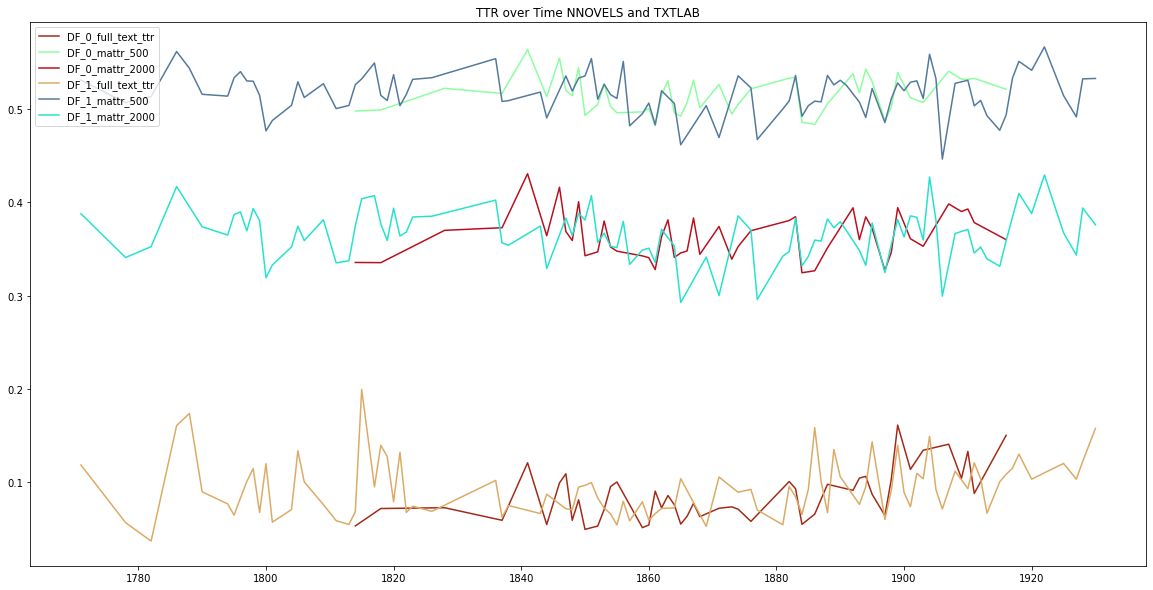

['The AVG of full_text_ttr of DF_0 is 0.08290950030189044']
['The MIN of full_text_ttr of DF_0 is 0.0392220390505141']
['The MAX of full_text_ttr of DF_0 is 0.1610358294236364']
['The AVG of mattr_500 of DF_0 is 0.5150712853537941']
['The MIN of mattr_500 of DF_0 is 0.4597617454423514']
['The MAX of mattr_500 of DF_0 is 0.5637052983994336']
['The AVG of mattr_2000 of DF_0 is 0.3628188536623376']
['The MIN of mattr_2000 of DF_0 is 0.3019184792873604']
['The MAX of mattr_2000 of DF_0 is 0.4306457705131664']
['The AVG of full_text_ttr of DF_1 is 0.09223837352968185']
['The MIN of full_text_ttr of DF_1 is 0.0366031633337277']
['The MAX of full_text_ttr of DF_1 is 0.1993181318278466']
['The AVG of mattr_500 of DF_1 is 0.5179328530500183']
['The MIN of mattr_500 of DF_1 is 0.3673956472953637']
['The MAX of mattr_500 of DF_1 is 0.5771000303282796']
['The AVG of mattr_2000 of DF_1 is 0.365972070932787']
['The MIN of mattr_2000 of DF_1 is 0.2133159679261588']
['The MAX of mattr_2000 of DF_1 is 

In [15]:
## 2) TTRS OVER TIME
visualize_numerical_columns__over_time(dfs, ['full_text_ttr', 'mattr_500', 'mattr_2000'], date_column='book_year', graph_y_label='TTR scores', title='TTR over Time NNOVELS and TXTLAB')


In [ ]:
## 2) %POS OVER TIME

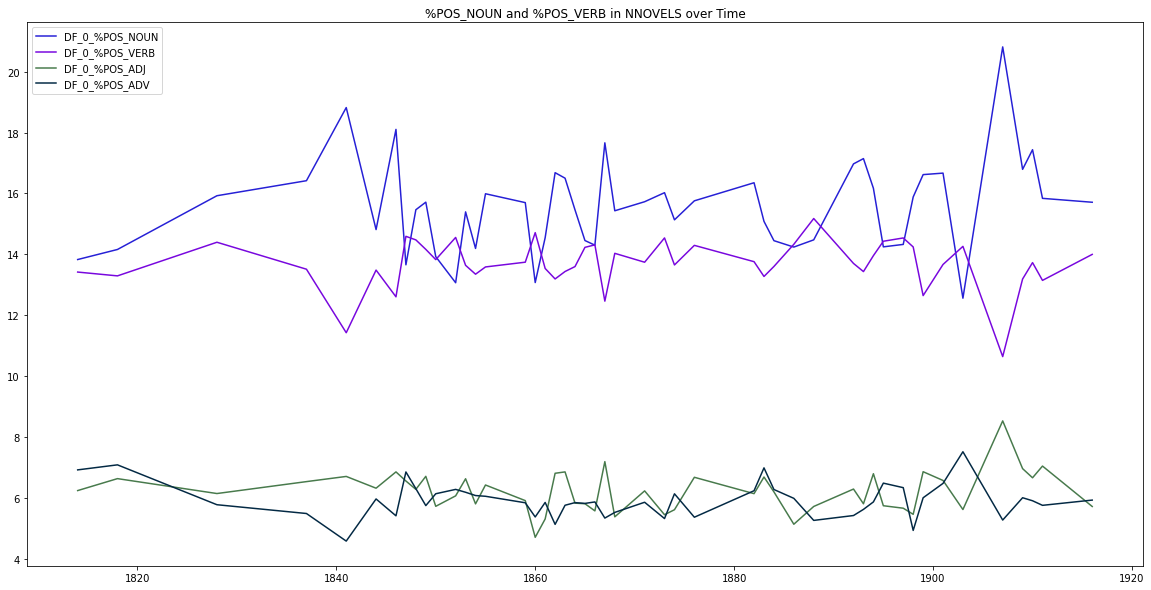

['The AVG of %POS_NOUN of DF_0 is 15.637814285714292']
['The MIN of %POS_NOUN of DF_0 is 12.565']
['The MAX of %POS_NOUN of DF_0 is 20.808']
['The AVG of %POS_VERB of DF_0 is 13.724514285714285']
['The MIN of %POS_VERB of DF_0 is 10.649']
['The MAX of %POS_VERB of DF_0 is 15.385']
['The AVG of %POS_ADJ of DF_0 is 6.2335714285714285']
['The MIN of %POS_ADJ of DF_0 is 4.709']
['The MAX of %POS_ADJ of DF_0 is 8.54']
['The AVG of %POS_ADV of DF_0 is 5.8599000000000006']
['The MIN of %POS_ADV of DF_0 is 4.536']
['The MAX of %POS_ADV of DF_0 is 7.528']


In [37]:
# NNOVELS
visualize_numerical_columns__over_time([df_nnovels_meta], ['%POS_NOUN', '%POS_VERB','%POS_ADJ', '%POS_ADV'], date_column='book_year', graph_y_label='TTR scores', title='%POS_NOUN and %POS_VERB in NNOVELS over Time')


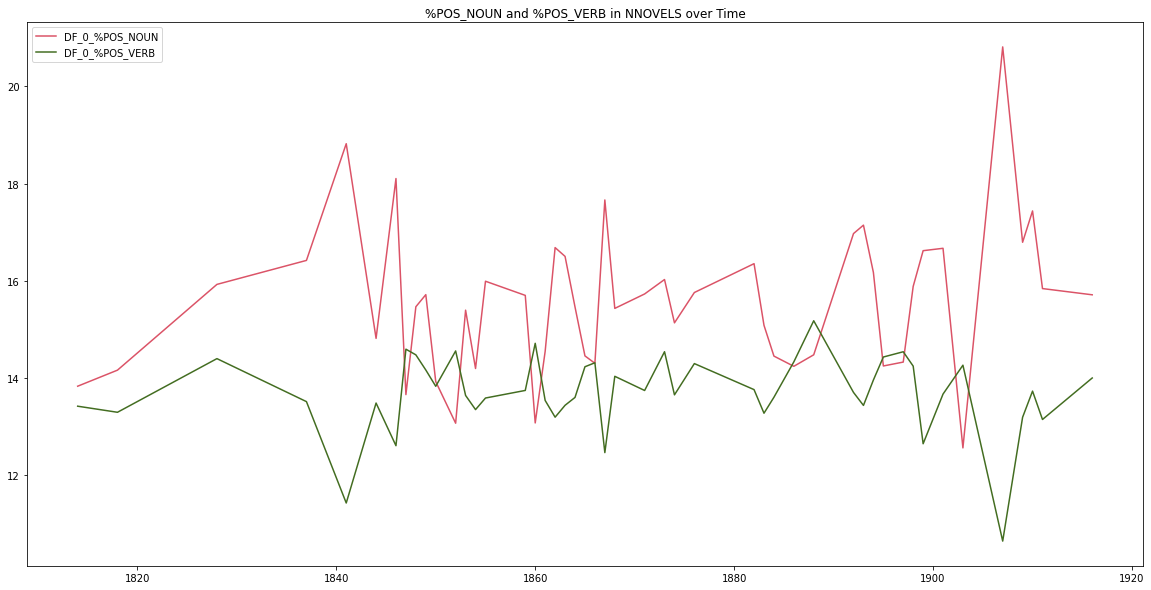

['The AVG of %POS_NOUN of DF_0 is 15.637814285714292']
['The MIN of %POS_NOUN of DF_0 is 12.565']
['The MAX of %POS_NOUN of DF_0 is 20.808']
['The AVG of %POS_VERB of DF_0 is 13.724514285714285']
['The MIN of %POS_VERB of DF_0 is 10.649']
['The MAX of %POS_VERB of DF_0 is 15.385']


In [33]:
# NNOVELS
visualize_numerical_columns__over_time([df_nnovels_meta], ['%POS_NOUN', '%POS_VERB'], date_column='book_year', graph_y_label='TTR scores', title='%POS_NOUN and %POS_VERB in NNOVELS over Time')


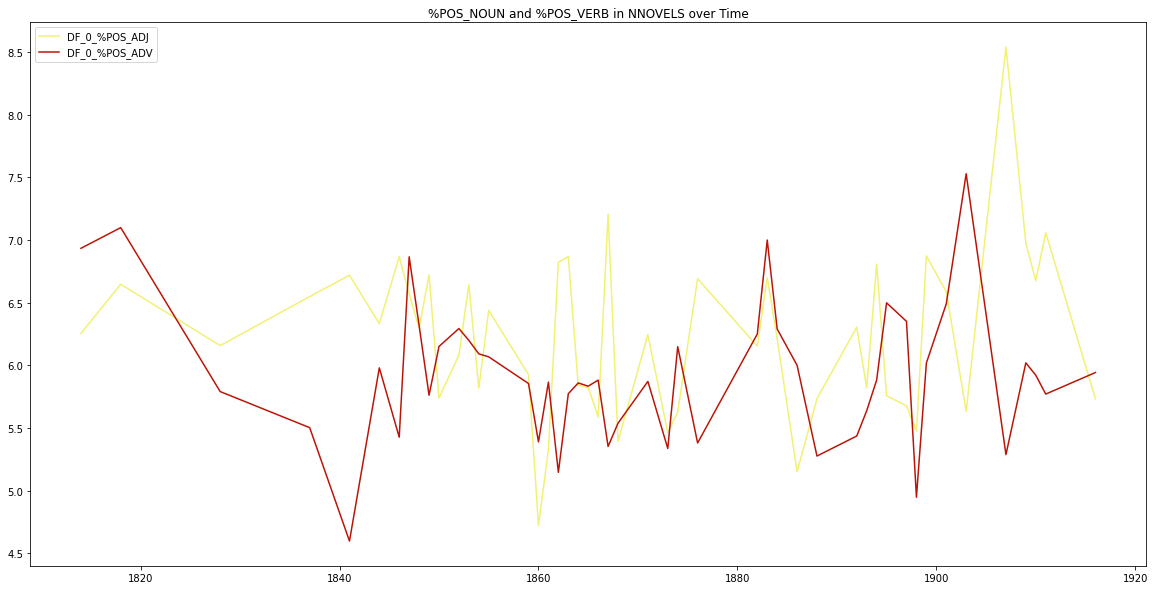

['The AVG of %POS_ADJ of DF_0 is 6.2335714285714285']
['The MIN of %POS_ADJ of DF_0 is 4.709']
['The MAX of %POS_ADJ of DF_0 is 8.54']
['The AVG of %POS_ADV of DF_0 is 5.8599000000000006']
['The MIN of %POS_ADV of DF_0 is 4.536']
['The MAX of %POS_ADV of DF_0 is 7.528']


In [34]:
visualize_numerical_columns__over_time([df_nnovels_meta], ['%POS_ADJ', '%POS_ADV'], date_column='book_year', graph_y_label='TTR scores', title='%POS_ADJ and %POS_ADV in NNOVELS over Time')


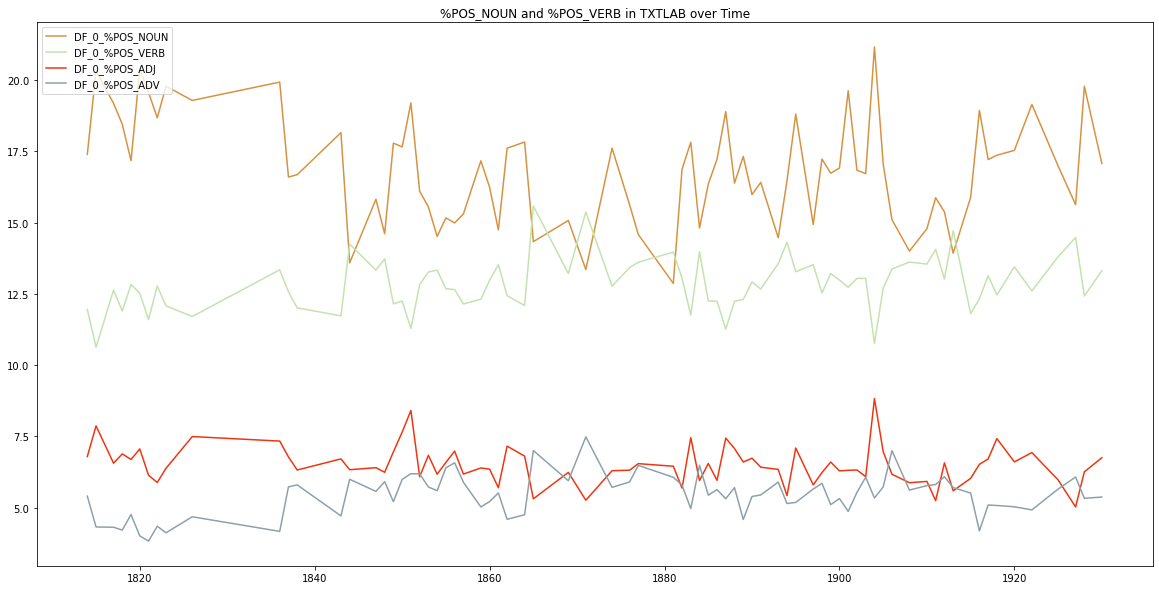

['The AVG of %POS_NOUN of DF_0 is 16.721362903225803']
['The MIN of %POS_NOUN of DF_0 is 10.263']
['The MAX of %POS_NOUN of DF_0 is 21.156']
['The AVG of %POS_VERB of DF_0 is 12.911717741935488']
['The MIN of %POS_VERB of DF_0 is 10.63']
['The MAX of %POS_VERB of DF_0 is 15.574']
['The AVG of %POS_ADJ of DF_0 is 6.527088709677421']
['The MIN of %POS_ADJ of DF_0 is 4.7']
['The MAX of %POS_ADJ of DF_0 is 8.847']
['The AVG of %POS_ADV of DF_0 is 5.492064516129033']
['The MIN of %POS_ADV of DF_0 is 3.763']
['The MAX of %POS_ADV of DF_0 is 10.747']


In [41]:
## TXTLAB
visualize_numerical_columns__over_time([df_txtlab_meta_1814], ['%POS_NOUN', '%POS_VERB','%POS_ADJ', '%POS_ADV'], date_column='book_year', graph_y_label='TTR scores', title='%POS_NOUN and %POS_VERB in TXTLAB over Time')


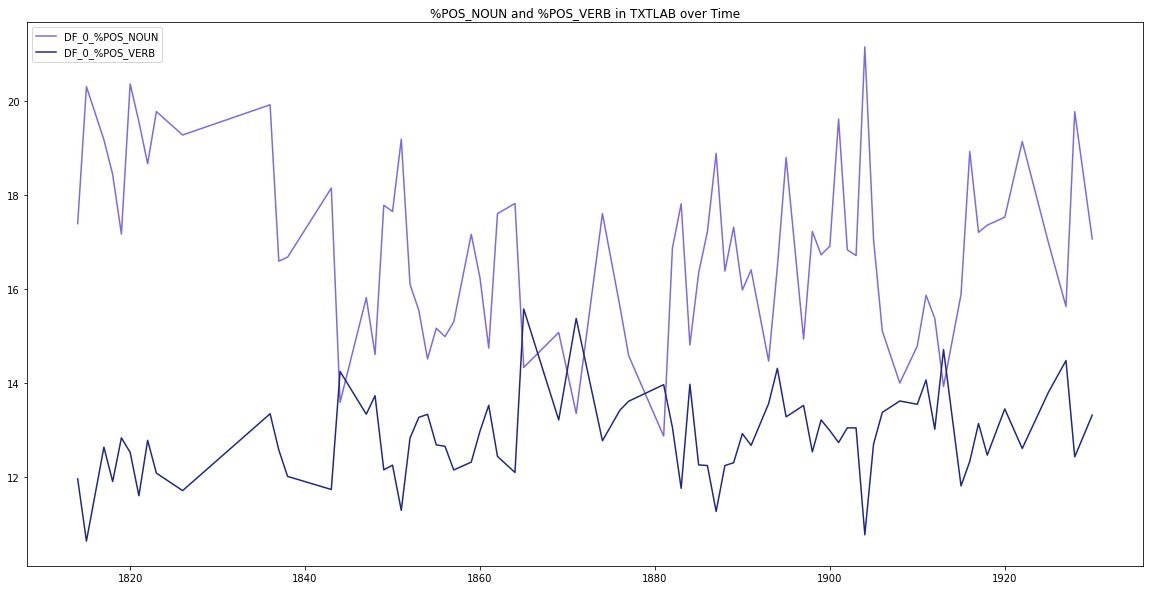

['The AVG of %POS_NOUN of DF_0 is 16.721362903225803']
['The MIN of %POS_NOUN of DF_0 is 10.263']
['The MAX of %POS_NOUN of DF_0 is 21.156']
['The AVG of %POS_VERB of DF_0 is 12.911717741935488']
['The MIN of %POS_VERB of DF_0 is 10.63']
['The MAX of %POS_VERB of DF_0 is 15.574']


In [36]:
## TXTLAB
visualize_numerical_columns__over_time([df_txtlab_meta_1814], ['%POS_NOUN', '%POS_VERB'], date_column='book_year', graph_y_label='TTR scores', title='%POS_NOUN and %POS_VERB in TXTLAB over Time')


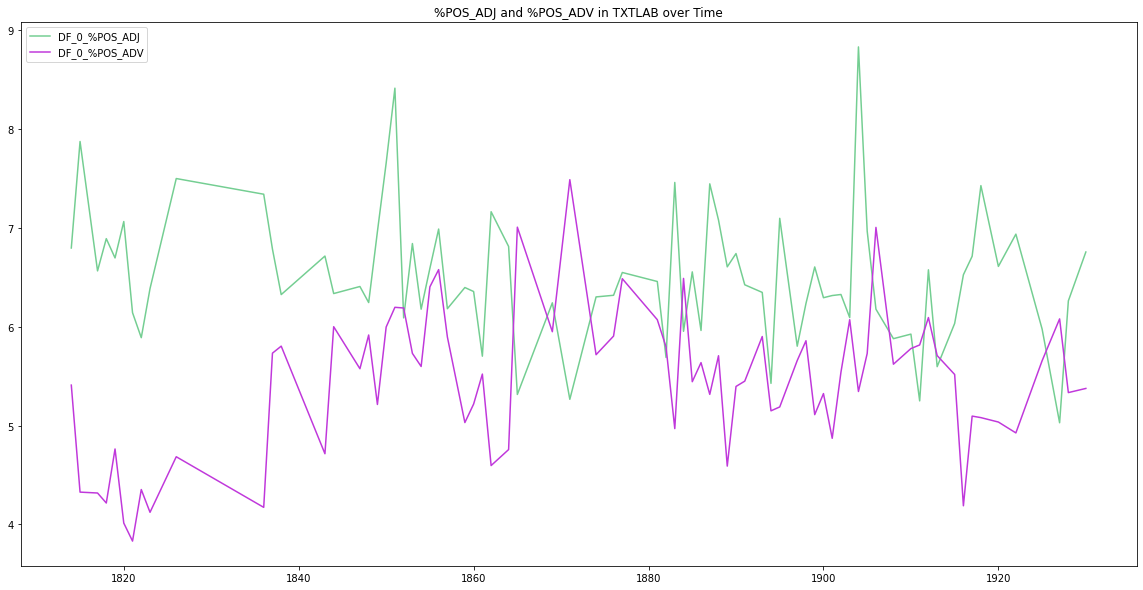

['The AVG of %POS_ADJ of DF_0 is 6.527088709677421']
['The MIN of %POS_ADJ of DF_0 is 4.7']
['The MAX of %POS_ADJ of DF_0 is 8.847']
['The AVG of %POS_ADV of DF_0 is 5.492064516129033']
['The MIN of %POS_ADV of DF_0 is 3.763']
['The MAX of %POS_ADV of DF_0 is 10.747']


In [31]:
visualize_numerical_columns__over_time([df_txtlab_meta_1814], ['%POS_ADJ', '%POS_ADV'], date_column='book_year', graph_y_label='TTR scores', title='%POS_ADJ and %POS_ADV in TXTLAB over Time')


In [ ]:
## 2) TTRS OVER TIME
visualize_numerical_columns__over_time([df_nnovels_meta, df_txtlab_meta_1814], ['full_text_ttr', 'mattr_500', 'mattr_2000'], date_column='book_year', graph_y_label='TTR scores', title='TTR over Time NNOVELS and TXTLAB')


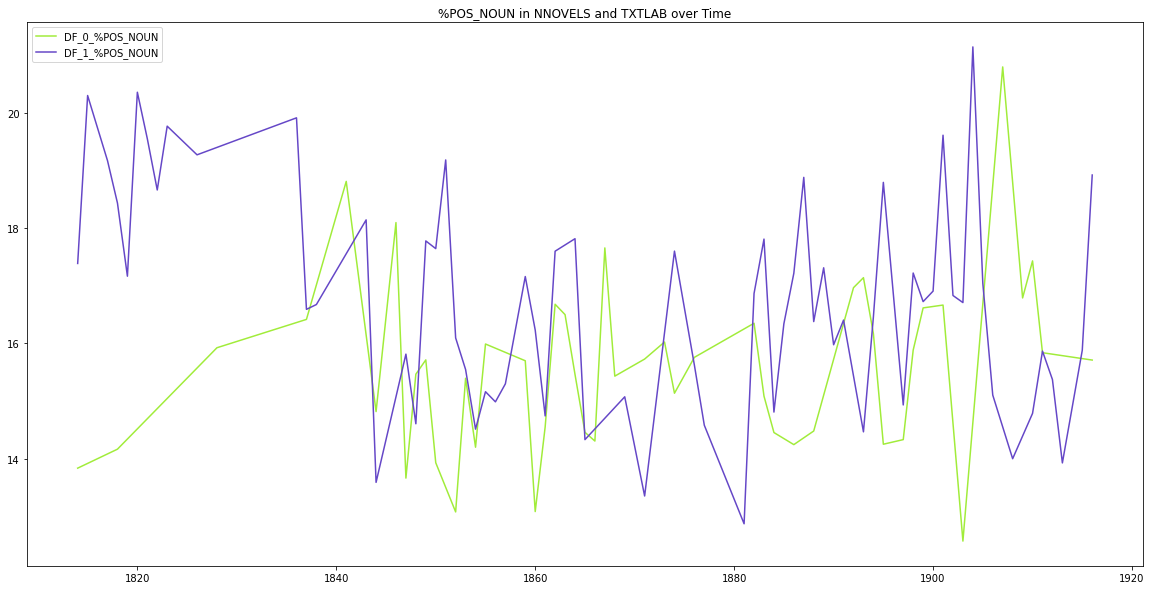

['The AVG of %POS_NOUN of DF_0 is 15.637814285714292']
['The MIN of %POS_NOUN of DF_0 is 12.565']
['The MAX of %POS_NOUN of DF_0 is 20.808']
['The AVG of %POS_NOUN of DF_1 is 16.613954954954952']
['The MIN of %POS_NOUN of DF_1 is 10.263']
['The MAX of %POS_NOUN of DF_1 is 21.156']


In [50]:
# COMPARING BOTH
visualize_numerical_columns__over_time([df_nnovels_meta, df_txtlab_meta_1814], ['%POS_NOUN'], date_column='book_year', graph_y_label='TTR scores', title='%POS_NOUN in NNOVELS and TXTLAB over Time')


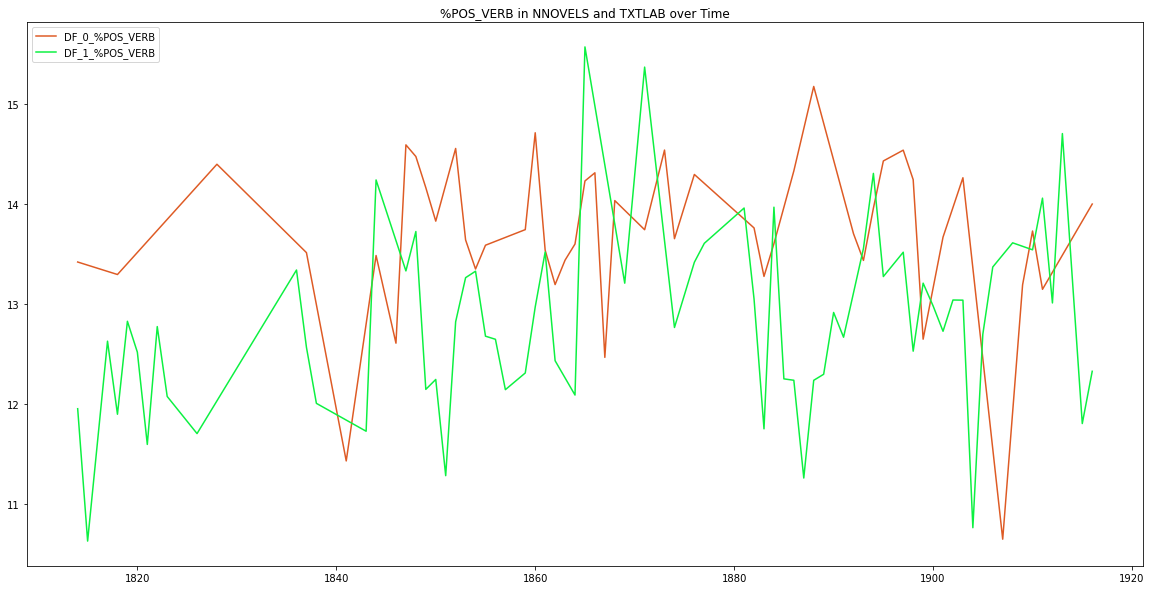

['The AVG of %POS_VERB of DF_0 is 13.724514285714285']
['The MIN of %POS_VERB of DF_0 is 10.649']
['The MAX of %POS_VERB of DF_0 is 15.385']
['The AVG of %POS_VERB of DF_1 is 12.87960360360361']
['The MIN of %POS_VERB of DF_1 is 10.63']
['The MAX of %POS_VERB of DF_1 is 15.574']


In [49]:
visualize_numerical_columns__over_time([df_nnovels_meta, df_txtlab_meta_1814], ['%POS_VERB'], date_column='book_year', graph_y_label='TTR scores', title='%POS_VERB in NNOVELS and TXTLAB over Time')


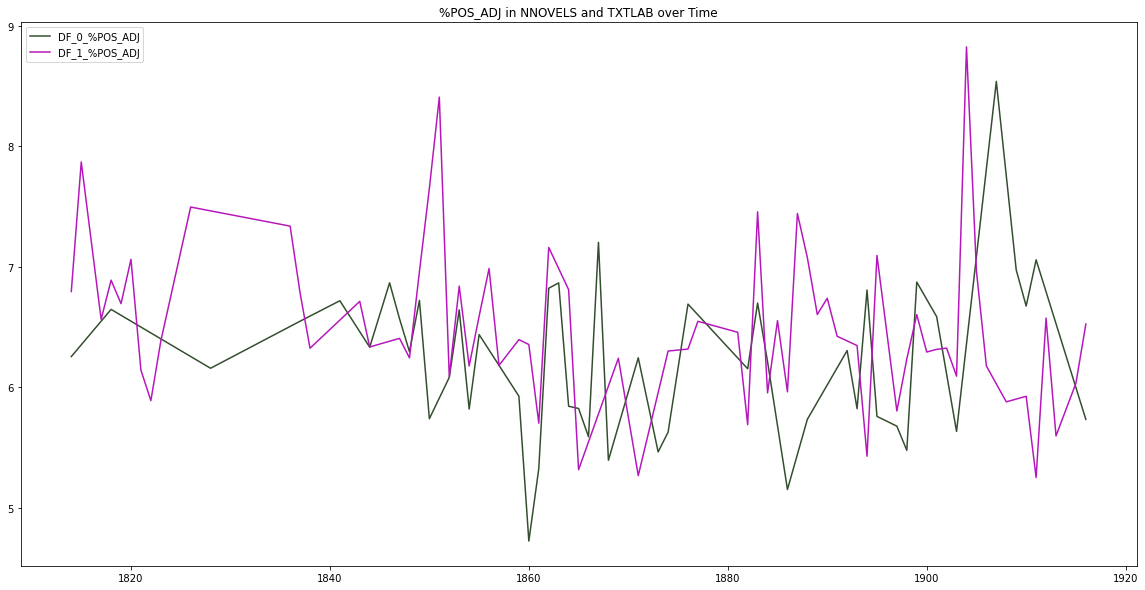

['The AVG of %POS_ADJ of DF_0 is 6.2335714285714285']
['The MIN of %POS_ADJ of DF_0 is 4.709']
['The MAX of %POS_ADJ of DF_0 is 8.54']
['The AVG of %POS_ADJ of DF_1 is 6.523333333333336']
['The MIN of %POS_ADJ of DF_1 is 4.7']
['The MAX of %POS_ADJ of DF_1 is 8.847']


In [53]:
visualize_numerical_columns__over_time([df_nnovels_meta, df_txtlab_meta_1814], ['%POS_ADJ'], date_column='book_year', graph_y_label='TTR scores', title='%POS_ADJ in NNOVELS and TXTLAB over Time')


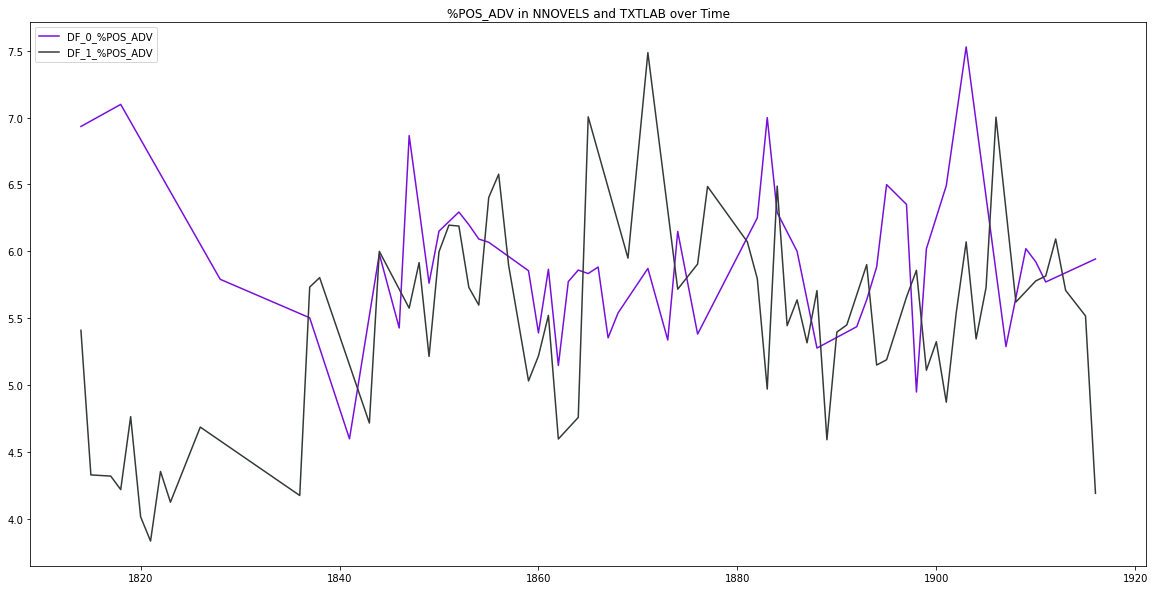

['The AVG of %POS_ADV of DF_0 is 5.8599000000000006']
['The MIN of %POS_ADV of DF_0 is 4.536']
['The MAX of %POS_ADV of DF_0 is 7.528']
['The AVG of %POS_ADV of DF_1 is 5.524792792792794']
['The MIN of %POS_ADV of DF_1 is 3.763']
['The MAX of %POS_ADV of DF_1 is 10.747']


In [54]:
visualize_numerical_columns__over_time([df_nnovels_meta, df_txtlab_meta_1814], ['%POS_ADV'], date_column='book_year', graph_y_label='TTR scores', title='%POS_ADV in NNOVELS and TXTLAB over Time')


In [ ]:
visualize_scatter_x_y(dfs, "book_year", "%POS_NOUN", title='Nnovels and txtLab SCATTERED by "book_year", "%POS_NOUN"')

In [55]:
## PIE CHART for POS tags in corpora

labels = ['%POS_PUNCT', '%POS_NOUN', '%POS_DET', '%POS_ADJ', '%POS_VERB', '%POS_SCONJ', '%POS_ADP', '%POS_AUX', '%POS_PART', '%POS_CCONJ', '%POS_ADV', '%POS_PROPN', '%POS_PRON', '%POS_NUM', '%POS_INTJ', '%POS_X', '%POS_SYM']
average_metrics = []
for label in labels:
    average_metrics.append(df_nnovels_meta[label].mean())
df_nnovels_POS = pd.DataFrame({'Part_of_Speech_Label': labels, 'Average_percentage': average_metrics})
# for label in labels:
#     average_metrics.append(df_txtlab_meta[label].mean())
# df_txtlab_POS = pd.DataFrame({'Part_of_Speech_Label': labels, 'Average_percentage': average_metrics})



<AxesSubplot:title={'center':'Pie chart of POS in NNOVELS'}, ylabel='Average_percentage'>

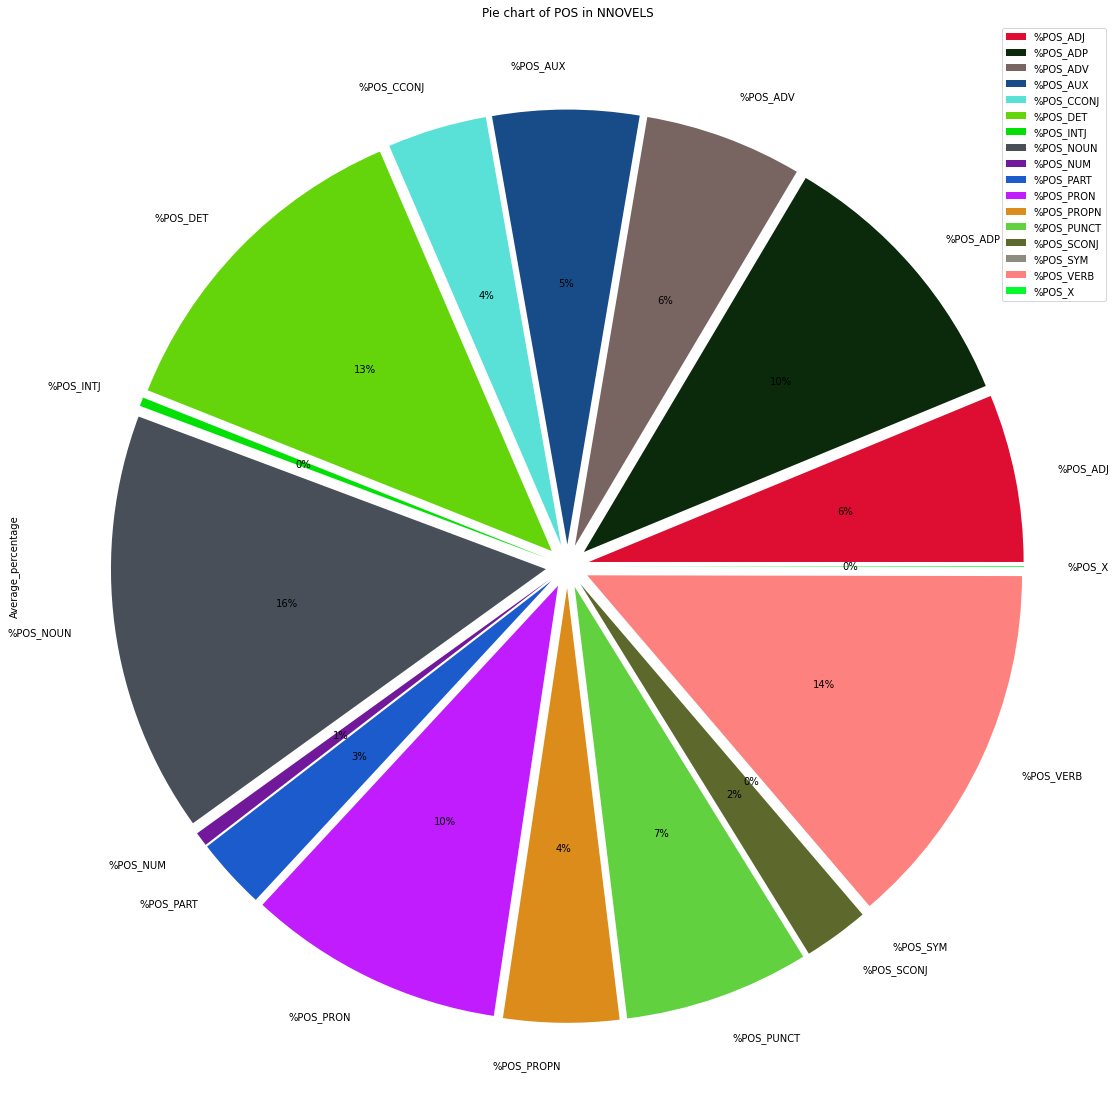

In [56]:
# Defining colors for the pie chart
colors_list = []
import random
for i in range(len(df_nnovels_POS)):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    colors_list.append(color)
  
explode = tuple([0.05 for i in range(len(df_nnovels_POS))])
# explode = (0.05, 0.05, 0.05)
  
# Plotting the pie chart for above dataframe
df_nnovels_POS.groupby(['Part_of_Speech_Label']).sum().plot(kind='pie', y='Average_percentage', autopct='%1.0f%%', colors=colors_list, explode=explode, figsize=(25, 20), title="Pie chart of POS in NNOVELS")

In [59]:
## PIE CHART for POS tags in corpora
labels = ['%POS_PUNCT', '%POS_NOUN', '%POS_DET', '%POS_ADJ', '%POS_VERB', '%POS_SCONJ', '%POS_ADP', '%POS_AUX', '%POS_PART', '%POS_CCONJ', '%POS_ADV', '%POS_PROPN', '%POS_PRON', '%POS_NUM', '%POS_INTJ', '%POS_X', '%POS_SYM']
average_metrics = []
for label in labels:
    average_metrics.append(df_txtlab_meta_1814[label].mean())
df_txtlab_POS = pd.DataFrame({'Part_of_Speech_Label': labels, 'Average_percentage': average_metrics})
# for label in labels:
#     average_metrics.append(df_txtlab_meta[label].mean())
# df_txtlab_POS = pd.DataFrame({'Part_of_Speech_Label': labels, 'Average_percentage': average_metrics})


<AxesSubplot:title={'center':'Pie chart of POS in TXTLAB'}, ylabel='Average_percentage'>

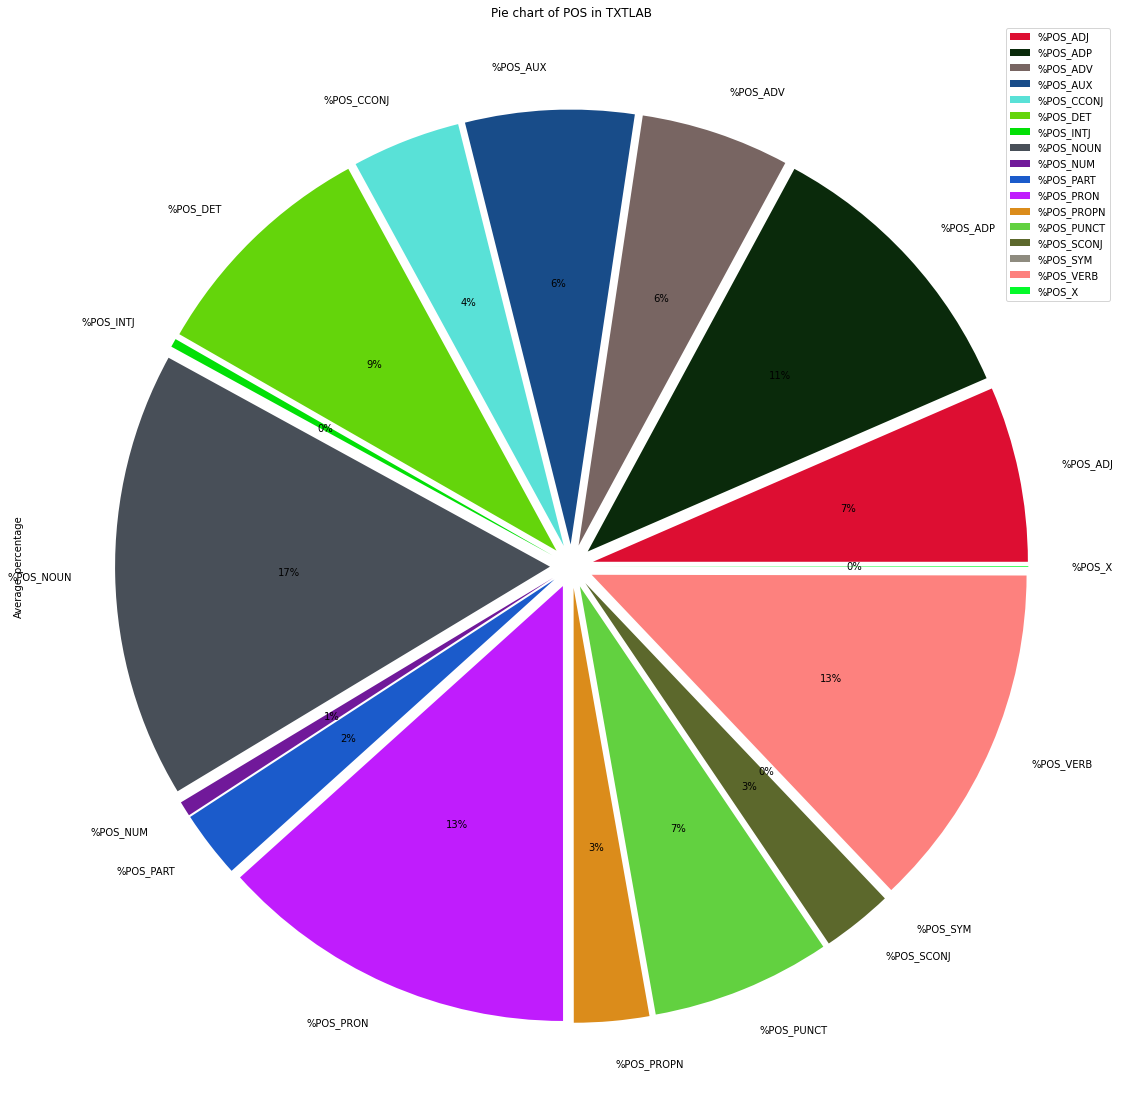

In [60]:
# # Defining colors for the pie chart
# colors_list = []
# import random
# for i in range(len(df_nnovels_POS)):
#     r = random.random()
#     b = random.random()
#     g = random.random()
#     color = (r, g, b)
#     colors_list.append(color)
  
# explode = tuple([0.05 for i in range(len(df_nnovels_POS))])
# # explode = (0.05, 0.05, 0.05)
  
# Plotting the pie chart for above dataframe
df_txtlab_POS.groupby(['Part_of_Speech_Label']).sum().plot(kind='pie', y='Average_percentage', autopct='%1.0f%%', colors=colors_list, explode=explode, figsize=(25, 20), title="Pie chart of POS in TXTLAB")

In [ ]:
# visualize_numerical_columns__over_time(dfs, ['%POS_NOUN'], date_column='book_year', graph_y_label='Average words per sentence', title='%POS Nouns over Time NNOVELS and TXTLAB')

In [ ]:
# visualize_numerical_columns__over_time(dfs, ['%POS_VERB'], date_column='book_year', graph_y_label='Average words per sentence', title='%POS Verbs over Time NNOVELS and TXTLAB')

In [ ]:
## SCATTER PLOTS
# visualize_scatter_x_y(dfs, "book_year", "words_count_stopless", title='Nnovels and txtLab SCATTERED by "book_year", "words_count_stopless"', place_label_above_by_how_much=1, percentile=2)

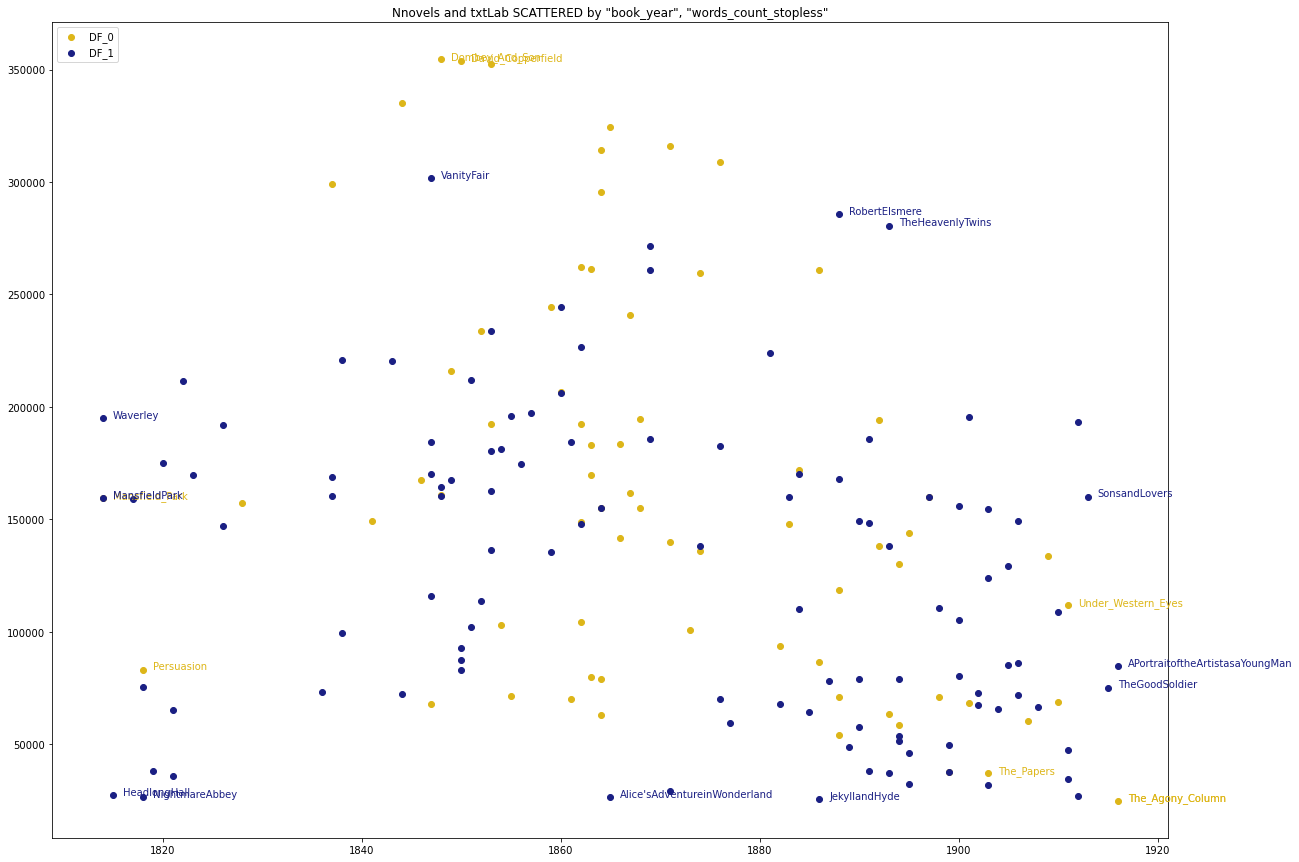

['The AVG of words_count_stopless of DF_0 is 163686.7']
['The MIN of words_count_stopless of DF_0 is 24909.0']
['The MAX of words_count_stopless of DF_0 is 354478.0']
['The AVG of words_count_stopless of DF_1 is 127443.62162162163']
['The MIN of words_count_stopless of DF_1 is 25598.0']
['The MAX of words_count_stopless of DF_1 is 301830.0']


In [67]:
dfs = [df_nnovels_meta, df_txtlab_meta_1814]
visualize_scatter_x_y(dfs, "book_year", "words_count_stopless", title='Nnovels and txtLab SCATTERED by "book_year", "words_count_stopless"')

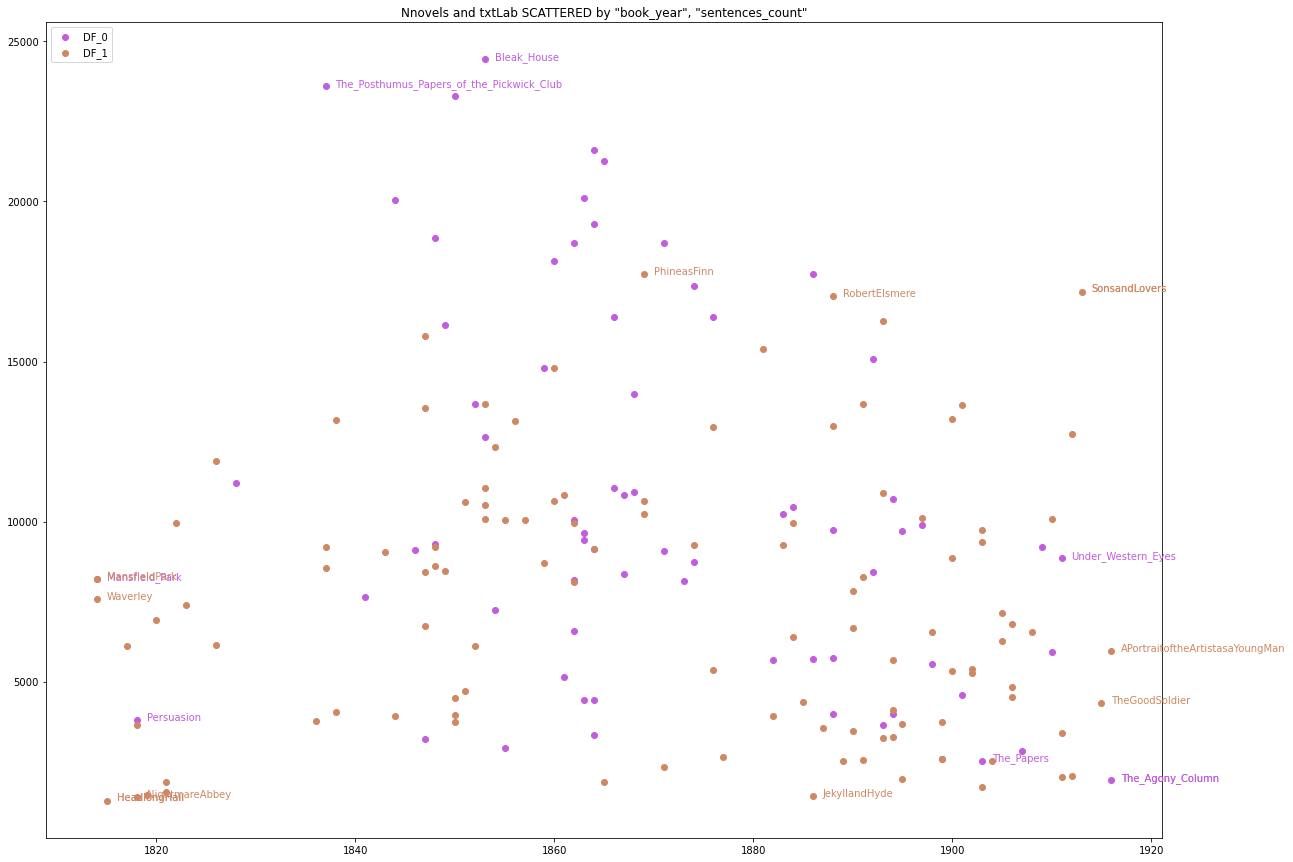

['The AVG of sentences_count of DF_0 is 10631.971428571429']
['The MIN of sentences_count of DF_0 is 1909.0']
['The MAX of sentences_count of DF_0 is 24438.0']
['The AVG of sentences_count of DF_1 is 7545.720720720721']
['The MIN of sentences_count of DF_1 is 1276']
['The MAX of sentences_count of DF_1 is 17733']


In [68]:
visualize_scatter_x_y(dfs, "book_year", "sentences_count", title='Nnovels and txtLab SCATTERED by "book_year", "sentences_count"')

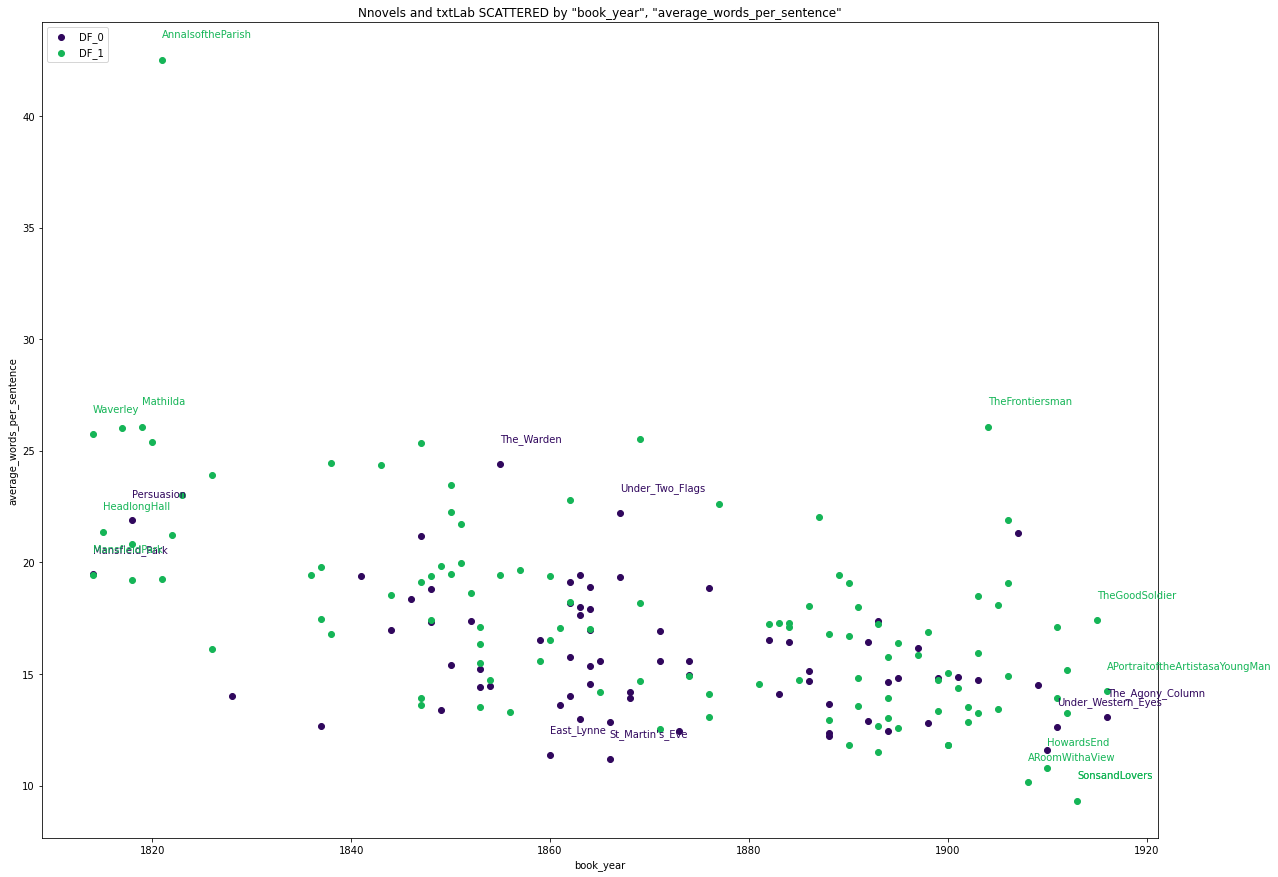

['The AVG of average_words_per_sentence of DF_0 is 15.844283556728685']
['The MIN of average_words_per_sentence of DF_0 is 11.19336544911275']
['The MAX of average_words_per_sentence of DF_0 is 24.41286589516678']
['The AVG of average_words_per_sentence of DF_1 is 17.555315501442575']
['The MIN of average_words_per_sentence of DF_1 is 9.317274684354452']
['The MAX of average_words_per_sentence of DF_1 is 42.52860858257477']


In [90]:
visualize_scatter_x_y(dfs, "book_year", "average_words_per_sentence", title='Nnovels and txtLab SCATTERED by "book_year", "average_words_per_sentence"')

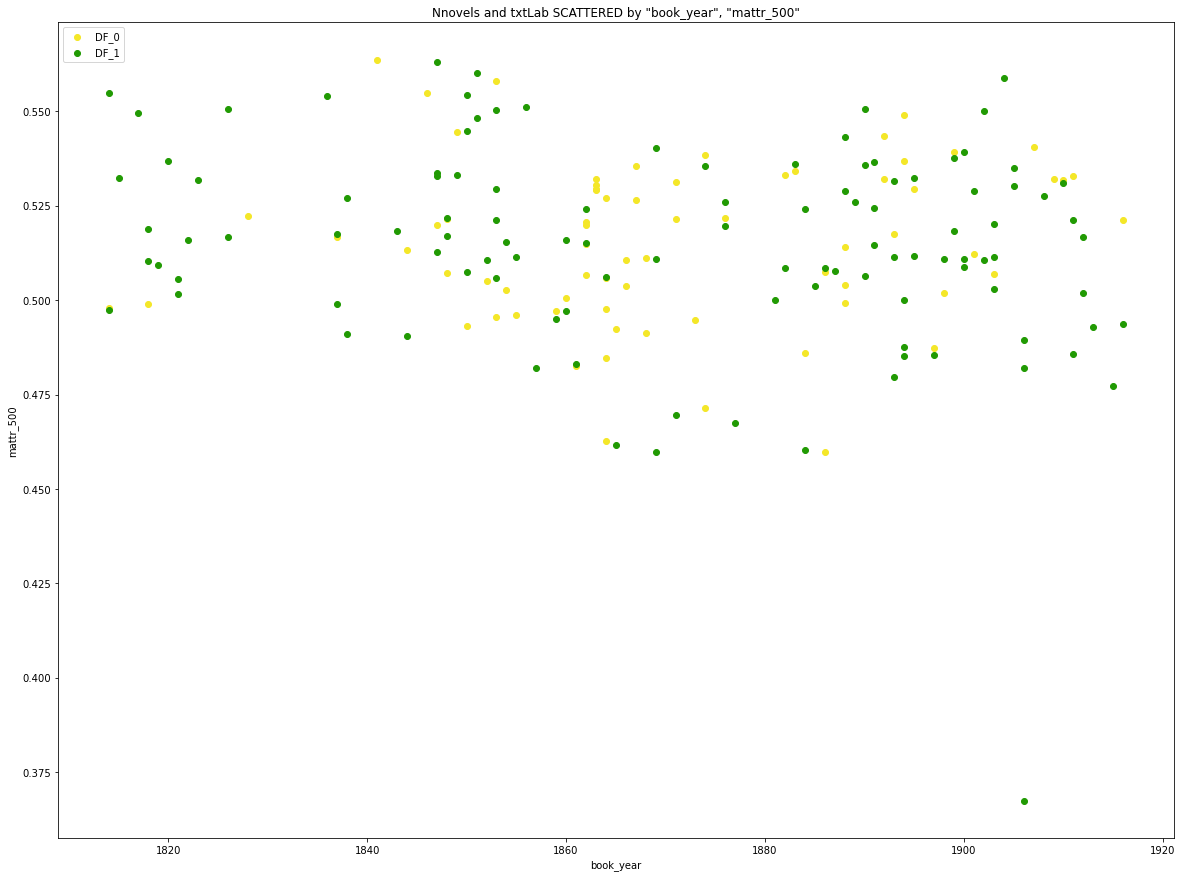

['The AVG of mattr_500 of DF_0 is 0.5150712853537941']
['The MIN of mattr_500 of DF_0 is 0.4597617454423514']
['The MAX of mattr_500 of DF_0 is 0.5637052983994336']
['The AVG of mattr_500 of DF_1 is 0.5149892888962108']
['The MIN of mattr_500 of DF_1 is 0.3673956472953637']
['The MAX of mattr_500 of DF_1 is 0.5630414235605762']


In [91]:
visualize_scatter_x_y(dfs, "book_year", "mattr_500", title='Nnovels and txtLab SCATTERED by "book_year", "mattr_500"')

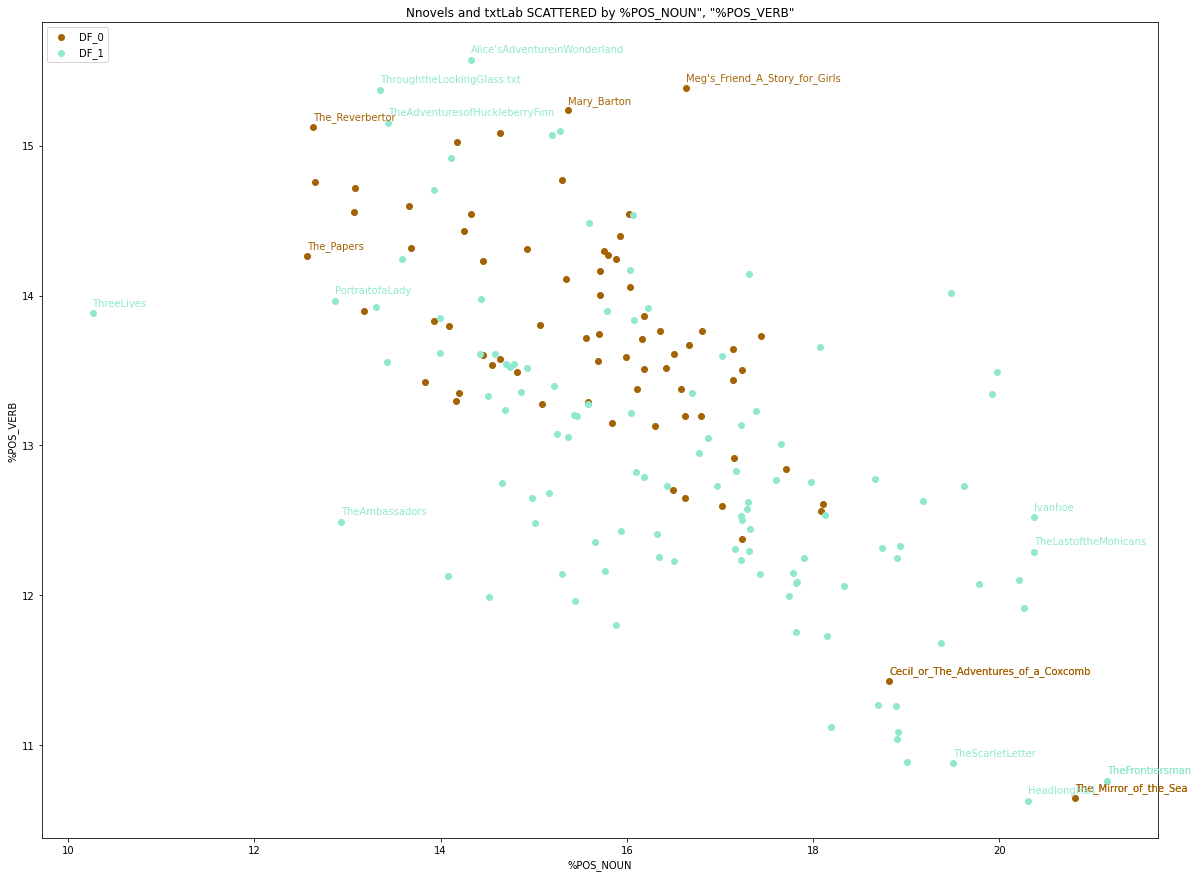

['The AVG of %POS_VERB of DF_0 is 13.724514285714285']
['The MIN of %POS_VERB of DF_0 is 10.649']
['The MAX of %POS_VERB of DF_0 is 15.385']
['The AVG of %POS_VERB of DF_1 is 12.87960360360361']
['The MIN of %POS_VERB of DF_1 is 10.63']
['The MAX of %POS_VERB of DF_1 is 15.574']


In [98]:
visualize_scatter_x_y(dfs, "%POS_NOUN", "%POS_VERB", title='Nnovels and txtLab SCATTERED by %POS_NOUN", "%POS_VERB"', place_label_above_by_how_much=0.05, percentile=2)

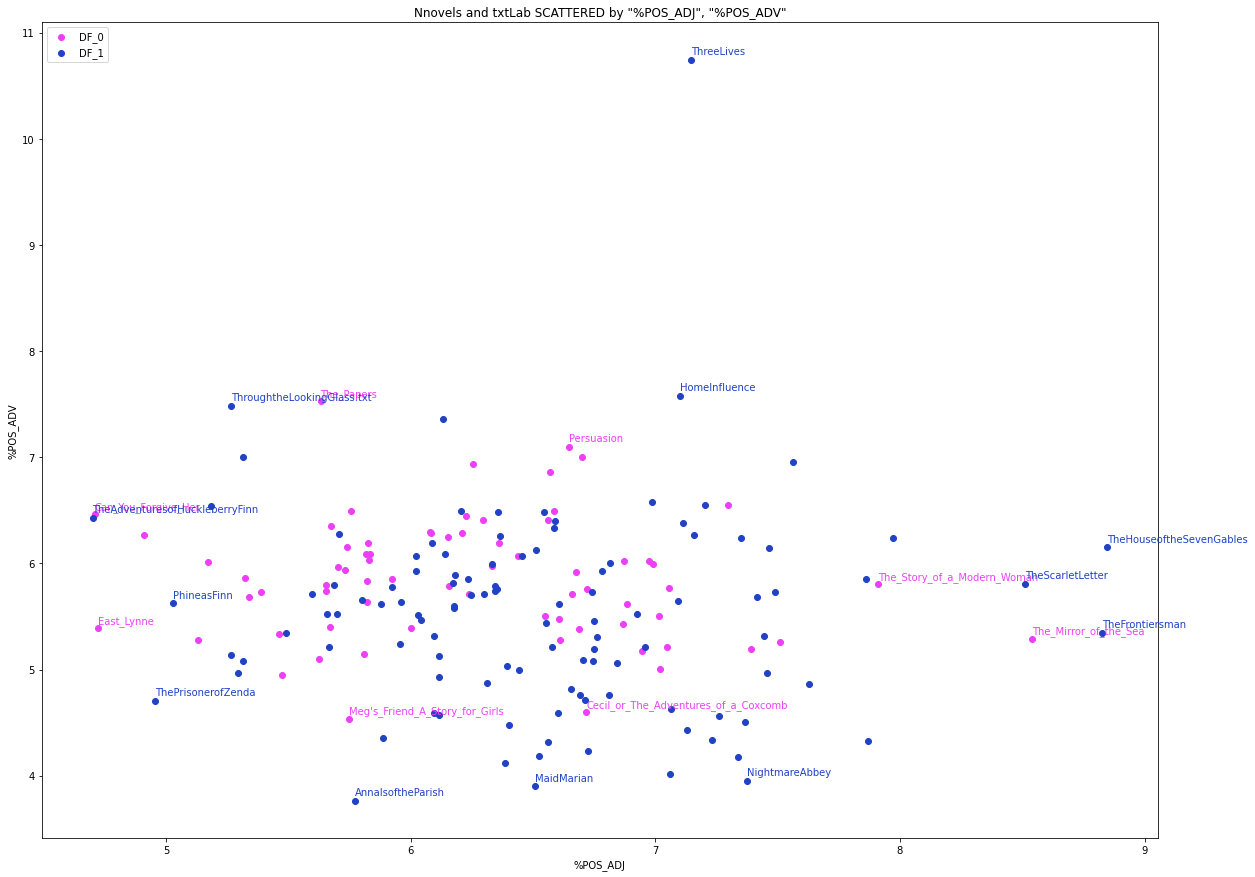

['The AVG of %POS_ADV of DF_0 is 5.8599000000000006']
['The MIN of %POS_ADV of DF_0 is 4.536']
['The MAX of %POS_ADV of DF_0 is 7.528']
['The AVG of %POS_ADV of DF_1 is 5.524792792792794']
['The MIN of %POS_ADV of DF_1 is 3.763']
['The MAX of %POS_ADV of DF_1 is 10.747']


In [104]:
visualize_scatter_x_y(dfs, "%POS_ADJ", "%POS_ADV", title='Nnovels and txtLab SCATTERED by "%POS_ADJ", "%POS_ADV"', place_label_above_by_how_much=0.05, percentile=2)


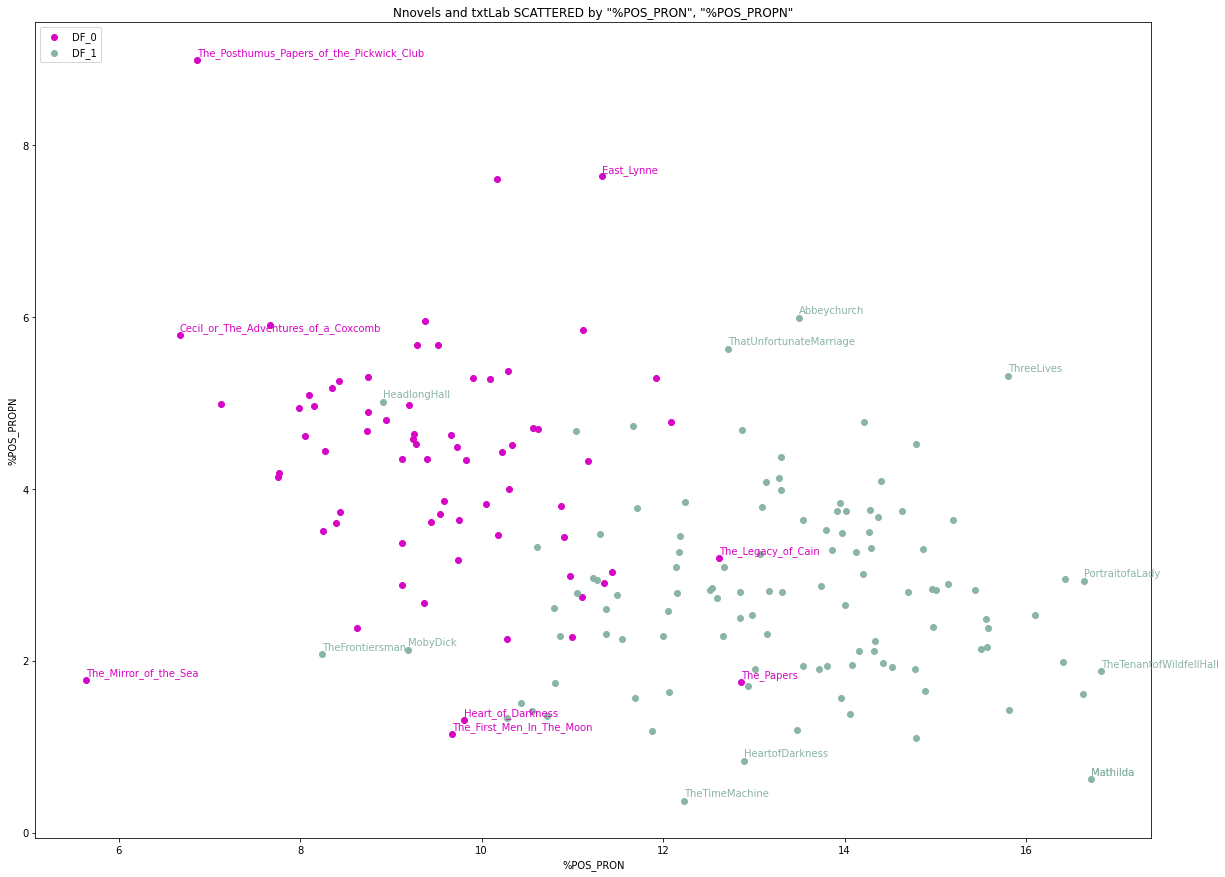

['The AVG of %POS_PROPN of DF_0 is 4.287371428571432']
['The MIN of %POS_PROPN of DF_0 is 1.148']
['The MAX of %POS_PROPN of DF_0 is 8.993']
['The AVG of %POS_PROPN of DF_1 is 2.7858198198198205']
['The MIN of %POS_PROPN of DF_1 is 0.371']
['The MAX of %POS_PROPN of DF_1 is 5.992']


In [108]:
visualize_scatter_x_y(dfs, "%POS_PRON", "%POS_PROPN", title='Nnovels and txtLab SCATTERED by "%POS_PRON", "%POS_PROPN"', place_label_above_by_how_much=0.05, percentile=2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='words_count_stopless', ylabel='Density'>

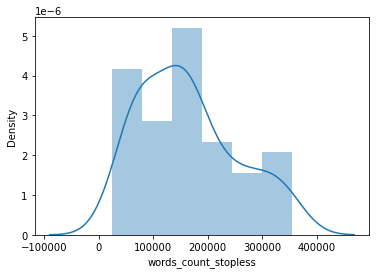

In [111]:
# ## HISTOGRAM OF STATS:
# https://realpython.com/python-histograms/
# https://data36.com/plot-histogram-python-pandas/
# https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/
# import seaborn as sns
# # df_nnovels_meta['words_count_stopless'].hist()
# # sns.distplot(df_nnovels_meta['words_count_stopless'])
# df = df_nnovels_meta[df_nnovels_meta.continent == 'Africa']
# sns.distplot(df['lifeExp'],  kde=False, label='Africa')

In [ ]:
visualize_scatter_x_y(dfs, "book_year", "words_count_stopless", title='Nnovels and txtLab SCATTERED by "book_year", "words_count_stopless"')

In [ ]:
visualize_scatter_x_y(dfs, "book_year", "words_count_stopless", title='Nnovels and txtLab SCATTERED by "book_year", "words_count_stopless"')

In [ ]:
# print(df_nnovels_meta.columns.tolist())

In [ ]:
# # Trying to get and print comparative data
# columns_to_compare = ['book_year', 'words_count_stopless', 'words_count_stopped', 'percentage_stopped_of_stoppless', \
#            'sentences_count', 'average_words_per_sentence', 'full_text_ttr', 'mattr_500', 'mattr_2000', 'all_pos_counts', '50_most_common_nouns', \
#            '50_most_common_verbs', 'POS_PUNCT', 'POS_NOUN', 'POS_DET', 'POS_ADJ', 'POS_VERB', 'POS_SCONJ', 'POS_ADP', 'POS_AUX', 'POS_PART', \
#            'POS_CCONJ', 'POS_ADV', 'POS_PROPN', 'POS_PRON', 'POS_NUM', 'POS_INTJ', 'POS_X', 'noun_percentage', 'verb_and_aux_percentage', 'POS_SYM', \
#            'parts_of_speech_total_count', '%POS_PUNCT', '%POS_NOUN', '%POS_DET', '%POS_ADJ', '%POS_VERB', '%POS_SCONJ', '%POS_ADP', '%POS_AUX', '%POS_PART', \
#            '%POS_CCONJ', '%POS_ADV', '%POS_PROPN', '%POS_PRON', '%POS_NUM', '%POS_INTJ', '%POS_X', '%POS_SYM']

# dfs = [df_nnovels_meta, df_txtlab_meta]
# for df in dfs:
#     # if dfs.index(df) == 0:
#     #     print("NNOVELS:")
#     # else:
#     #     print("TXTLAB:")
#     for column in columns_to_compare:
#         try:
#             print("The AVG for column " + str(column) + " is " + str(df[column].mean()))
#             print("The MAX for column " + str(column) + " is " + str(df[column].max()))
#             print("The MIN for column " + str(column) + " is " + str(df[column].min()) + "\n")
#         except Exception as e:
#             pass
        